<a href="https://colab.research.google.com/github/Nouran-Khallaf/Arabic-Readability-Corpus/blob/main/freetxt_thesawrws_task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Instructions
Before `run_all` kindly dowload and add those files [Dataset_5Reviews](https://github.com/Nouran-Khallaf/FreeTxt-Thesawrws_task/blob/main/5_Reviews.xlsx) and [MohaTaher_Arabic-stop-words](https://github.com/Nouran-Khallaf/FreeTxt-Thesawrws_task/blob/main/MohaTaher_arabic-stopwords.txt) to the colab content folder.

In [75]:
##you can run this cell to upoad the two files using the colab uploader
from google.colab import files
uploaded = files.upload()

Saving 5_Reviews.xlsx to 5_Reviews (1).xlsx
Saving MohaTaher_arabic-stopwords.txt to MohaTaher_arabic-stopwords (1).txt


# Introduction
### This notebook is dedicated  to solve "FreeTxt/Thesawrws task" that is composed of six main steps as follows:
1. review two Python (preferably Python version 3) NLP libraries and choose one to perform the following task. In a comment at the beginning of the code you prepare, please briefly justify your choice of library for this task. 
2. use the chosen NLP library to tokenise text from a set of five travel related reviews, selected for example from TripAdvisor or Google reviews (you are welcome to choose other sources and the choice of natural language is yours).
3. pre-process the articles by removing noise e.g. HTML tags, stop words, punctuations and symbols.
4. add part of speech (POS) tags and Named Entity Recognition (NER) tags to the extracted text (to make sure that the taggers work with the chosen language).
5. use the tagged text and any other tools of your choice to score the sentiment expressed in the five travel reviews. You can choose document level, sentence level or another level for your sentiment scores.
6. provide a ranked list of the sentiment scores and texts you scored in the previous step.
7. please upload the code with comments online on GitHub by creating a private repository and sharing it with us (usernames: IgnatiusEzeani, drelhaj and perayson).
8. make sure the results from step 6 are displayed and uploaded for us to check and that the code is runnable. You can use a notebook format with all cells run if you wish.


# **1) Two Python NLP Libraries**


## **1- Natural Language Toolkit (NLTK)**

Link: [https://www.nltk.org/](https://www.nltk.org/) ‚Äî Official website for NLTK documentation.

Resource: [NLTK Book](https://www.nltk.org/book/) ‚Äî Complete course on Natural Language Processing in Python using NLTK.

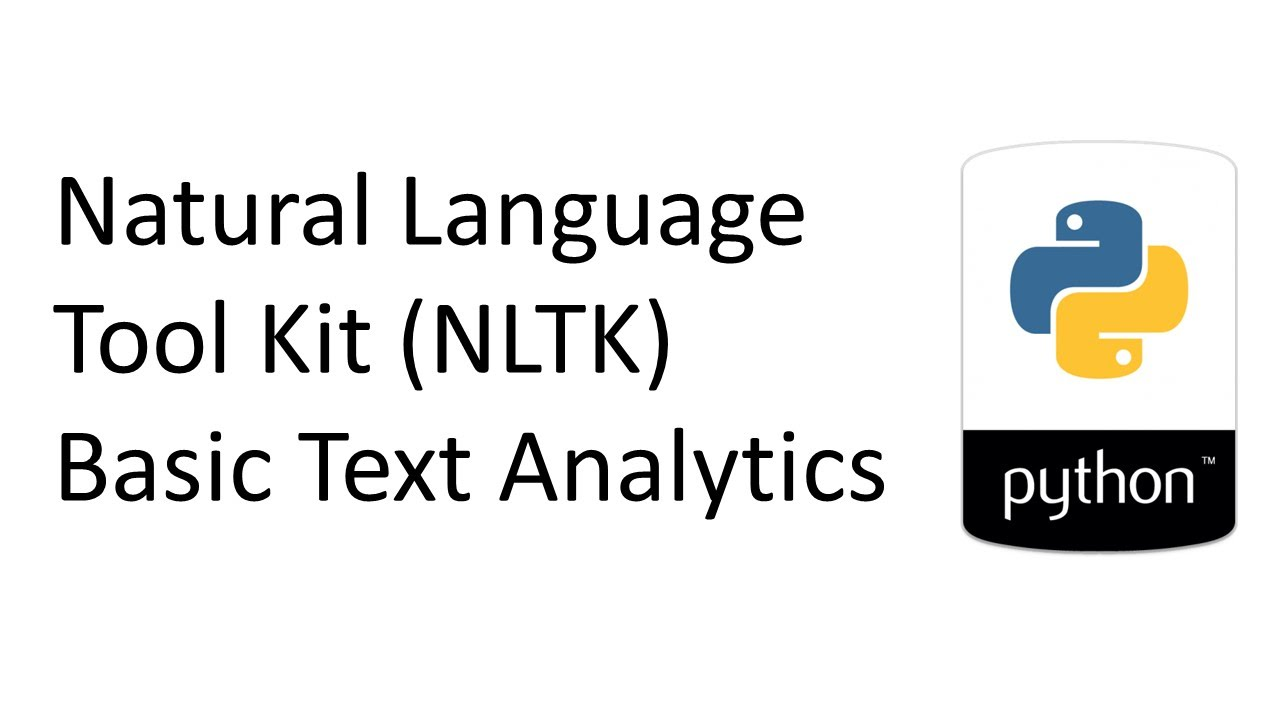

NLTK library was developed by *Steven Bird* and *Edward Loper* at the *University of Pennsylvania*. NLTK is one of the easiest and earliest libraries used to build NLP programmes in python. which is widely considered the best Python library for NLP. NLTK is an essential library any NLP developer should know. It serves as an educational foundation for Python developers who are starting their machine learning career. It is suitable for students, educators, engineers, researchers, and industry professionals. Following step by step in the resource book that presents a practical introduction to programming for NLP.

NLTK supports tasks starting from basic tasks such as tokenization, lemmatization, stemming, chunking, parsing, semantic reasoning, and POS tagging to some more complex tasks as classification, and wrappers for industrial-strength NLP libraries. It also allows user to define your language rules as a finite-state transducer (FST) and applying the pre-developed functions. It offers a suite of open source data sets with over 100 corpora and lexical resources, such as WordNet, Web Text Corpus, NPS Chat, SemCor, and FrameNet. NLTK supports various languages, as well as named entities for multi language. 

NLTK is a free and open-source library that an be accessed in Python version 3.6 and above and available on Windows, Mac OS and Linux with plenty of tutorials to make your entry into the world of NLP smooth. NLTK limitations appear in the steep learning curve, it preforms tasks slowly, and it dose not supports neural network models.
Despite these limitations and the development of other NLP libraries, many researches still using NLTK to perform pre-processing for many languages. 


## **2- CAMeL Tools**
Link: [https://github.com/CAMeL-Lab/camel_tools](https://github.com/CAMeL-Lab/camel_tools)

Reference: [https://aclanthology.org/2020.lrec-1.868/](https://aclanthology.org/2020.lrec-1.868/)

Documentation: [https://camel-tools.readthedocs.io/en/latest/](https://camel-tools.readthedocs.io/en/latest/)

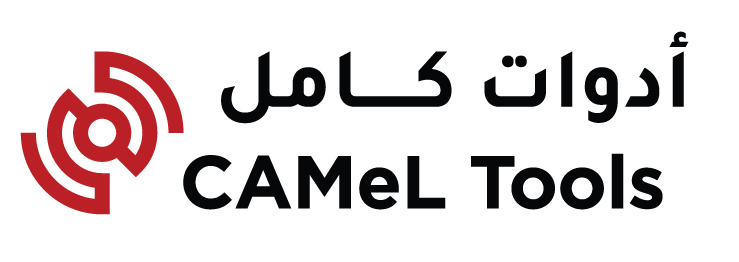

CAMel tools is an open-source toolkit for Arabic natural language processing in Python. It allows Arabic NLP tasks  such as pre-processing, morphological analysis, POS-tagging, dialect identification, named entity recognition and sentiment analysis. Also, it provides command-line interfaces
and application programming interfaces (APIs) to be embedded in different applications and tools.

This is one of the main easy to use NLP tools that supports Arabic and
Arabic dialect. CAMel tools it is a continum of years of reaserch to achieve a better analysis pereformance that deals with a highly morphological language as Arabic.

It should be highlighted that its pre-processing stage includes transliteration, unicode normalization, and letter noramlization.These functions are unique to Arabic. Hence, having a normalized text is very important when analysing Arabic. For instance, matching words with the same lemmas despite their orthographic mismatch form.



### **Hence, this notebook will use CAMel tools to accomplish the task. Sometimes I will use NLTK also to compare and justify using CAMel tools.**

###Before we continue completing the task we need first to download the tools that we will use.

### 1) Arabic NLP analysis toolkit 
1- Install CAMel Tools Python package. You can obtain the package by installing it using pip.

In [1]:
%pip install camel-tools

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 114 kB 31.3 MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 4.9 MB 39.8 MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 216 kB 56.3 MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 418 kB 60.4 MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 120 kB 60.6 MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 6.6 MB 67.0 MB/s 
  Created wheel for camel-kenlm: filename=camel_kenlm-2021.12.27-cp37-cp37m-linux_x86_64.whl size=2333338 sha256=c2d6d69add89f9a9782fb941e3a1d23eafd64e69ae289d9c92a3c258

2- Mount to a google drive to creat a directory and install all the datasets required.

**NOTE:** it needs at least 2.3GB of available space on your Google Drive to install all the CAMeL Tools data.

In [2]:
from google.colab import drive
import os
drive.mount('/gdrive')
%mkdir /gdrive/MyDrive/camel_tools

Mounted at /gdrive
mkdir: cannot create directory ‚Äò/gdrive/MyDrive/camel_tools‚Äô: File exists


3- Tell CAMeL Tools to install the data in the newly created directory.

In [3]:
os.environ['CAMELTOOLS_DATA'] = '/gdrive/MyDrive/camel_tools'
!export | camel_data -i all

No new packages will be installed.


**Note: For the second time running the CAMel Tools, just run the following set.**

In [4]:
%pip install camel-tools

from google.colab import drive
import os

drive.mount('/gdrive')
os.environ['CAMELTOOLS_DATA'] = '/gdrive/MyDrive/camel_tools'

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


###2) For the purpuse of data visualisation. 

*  Install Arabic word cloud `ar_wordcloude`
*  It is a tiny wrapper around wordcloud.WordCloud to support WordCloud with Arabic text.

In [ ]:
!pip install ar_wordcloud

### 3) Pre-processing 


*   Install a Library to identify the ***emoji*** in any text. ` emoji`

*   Install a library to identify the ***stop words*** in any text. `nltk.download('stopwords')`
*   Install a library to identify the ***wordtokenisation*** in any text. `nltk.download('punkt')`



In [6]:
## Get the emoji library
!pip install emoji
## Get the arabic Stop words list
import nltk
nltk.download('stopwords')
## Get the punctuation list
nltk.download('punkt')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [7]:
#utilities
##read datasets
import pandas as pd
import numpy as np
import time
##plotting
import matplotlib.pyplot as plt
##visuailization
from wordcloud import WordCloud
from ar_wordcloud import ArabicWordCloud
#text processing & sentiment analysis
import re
import emoji
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords

2. use the chosen NLP library to tokenise text from a set of five travel related reviews, selected for example from TripAdvisor or Google reviews (you are welcome to choose other sources and the choice of natural language is yours).


# **2) Select five Tripadvisor reviews and Tokenise the text**
The direct path to get ***Tripadvisor reviews*** is by scraping sepcific pages for hotel, city, resturant's reviews. This could be done by using `selenium` and `kora` libraries. Those libriries allows to find specific elements in webpages and extract the data. 

Taking into account that the task here specified only five reviews about travel which could be easily by manually selecting those reviews from the tripadvisor website.

However, I explaind here the first method for getting the reviews with automatic scraping as a refrence for a full data collection. After that I have manually selected five differnt reviews to enable showing various preprocessing issues and thier resolvation.




## Automatic scrapping
1- install the requried libraries `selenim` and `kora`

In [8]:
## install the scrapping libraries
!pip install selenium
!pip install kora -q

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 985 kB 28.8 MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 358 kB 51.6 MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 140 kB 46.5 MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 58 kB 6.4 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
requests 2.23.0 requires urllib3!=1.25.0,!=1.25.1,<1.26,>=1.21.1, but you have ur

     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 57 kB 3.9 MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1.6 MB 15.7 MB/s 


In [9]:
#import the installed libraries to creat the webdriver
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import time

2- Specify the ***URL*** of the reviews in any first page of tripadvisor reviews

Here, I sepcified an url for reviews about a palce in Hurghada city called the Marina in the red sea in Egypt.

In [10]:
url = "https://www.tripadvisor.co.uk/Attraction_Review-g297549-d3806192-Reviews-Hurghada_Marina-Hurghada_Red_Sea_and_Sinai.html"

3- Specify which browser you will use, here I am using `Google Chrome`

In [11]:
# Install the chrome web driver from selenium. 
!apt-get update 
!apt install chromium-chromedriver
from kora.selenium import wd
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
driver = webdriver.Chrome('chromedriver',chrome_options=chrome_options)
wd.get(url)

Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Hit:2 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:3 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:4 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Get:5 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:6 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Ign:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:8 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:9 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:11 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ Packages [92.1 kB]
Hit:12 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:13 http://ppa.laun

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: use options instead of chrome_options
  if __name__ == '__main__':


4- To visualise the Webdriver and make sure that we specified the right URL. this is done by recalling the webdriver which we named `wd`

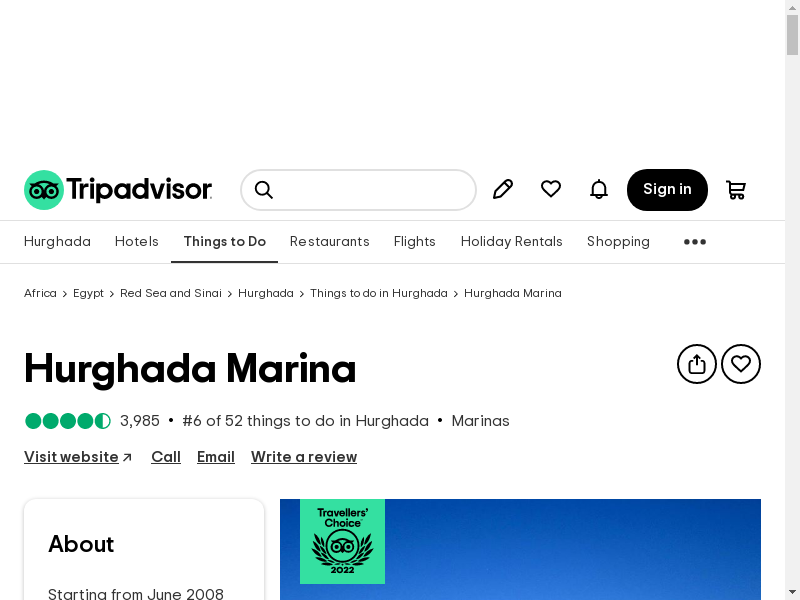

In [12]:
wd

5- As we are intresetd in reviwers written in Arabic Language. We first need to specify the language filter in the website to Arabic. On tripAdvisor webpage we need to click the language button and choose Arabic menu-item-ar from a Listbox.

In [13]:
##find the button and Click to open the languages listbox
wd.find_element(By.XPATH, '//*[@id="tab-data-qa-reviews-0"]/div/div[1]/span/div/div[2]/div/div/span[2]/span/div/div/button').click()
##sleep to give time to the browser to open the listbox
time.sleep(3)
## choose Arabic language by 'menu-item-ar' you can change the language code to specify any other language
wd.find_element(By.XPATH,'//*[@id="menu-item-ar"]').click()

6- imagine now that we have an open webpage showing Hurghada Marina reviews in Arabic. Now what we need to do is to extarct each review text along with its information such as, score, title, and user name.

In [14]:
### creating lists to add the data per each review specefing (username, Title of the review, the review, and the score given)
name_list = []
titles_list = [] 
reviews_list = [] 
score_list = []
score_list_final = []

## the range is to specify how many pages you want to scrap, here, we are scrapping 50 pages
for i in range(0, 50):
  # Extract Usernames.
  ## XPATH could be extracted by inspect element in the HTML page using any browser to get the PATH for the specific element
  names = wd.find_elements(By.XPATH, "(//span[@class='biGQs _P fiohW fOtGX']/a)")
  for name in range(len(names)):
    if names[name].text =='':
      True
    else:
        name_list.append(names[name].text)
  # Extract review title.
  review_names = wd.find_elements(By.XPATH, "(//a[@class='BMQDV _F G- wSSLS SwZTJ FGwzt ukgoS']/span)") 
  for review in range(len(review_names)):
    titles_list.append(review_names[review].text)

  # Extract reviews.  
  reviews = wd.find_elements(By.XPATH, "(//div[@class='biGQs _P pZUbB KxBGd']/span)") 
  for review in range(len(reviews)):
    reviews_list.append(reviews[review].text) 
  # Extract scores.  
  scores = wd.find_elements(By.XPATH, "(//*[name() = 'svg'][contains(@class, 'UctUV d H0')][contains(@width, '88')])") 
  for score in range(len(scores)):
    ## here we extract the label from the svg image and get the value of the bubbles
    if  scores[score].get_attribute("aria-label")== '' :
      False
    else:
      bubble = scores[score].get_attribute("aria-label")
      ## only to extract the score which is the first element from the text '4 out of 5 bubbles'
      score_list.append(bubble[0])
  ## here to ignore the first elemnet that is always the overall reviews score
  score_list = score_list[1:]
  score_list_final.extend(score_list)
  score_list = []
  wd.find_element(By.XPATH, "//a[@class='BrOJk u j z _F wSSLS tIqAi unMkR']").click()
  ## add a pause to give time to load each page
  time.sleep(2)

  

7- Create the Dataset

combining all lists and convert to a pandas Dataframe.

In [15]:
data =list( zip(name_list, titles_list, reviews_list, score_list_final))
reviews = pd.DataFrame(data,columns=['UserName', 'Title', 'Review','Score'])
reviews.head(10)

UserName           Title  \
0               fox          ÿßŸÑÿ£ŸÇÿµÿ±   
1          Yousef M  ÿßŸÑÿ∫ÿ±ÿØŸÇŸá ŸÖÿßÿ±ŸäŸÜÿß   
2            fasoos         ÿßŸÑŸÇÿßŸáÿ±ÿ©   
3            Hoda E       Nasr city   
4           Nancy A       ŸÖŸÉÿßŸÜ ÿ±ÿßÿ¶ÿπ   
5     Ahmed Elbadry           ÿ£ÿ≥ŸäŸàÿ∑   
6        Mohammed S       ŸÖŸÉÿßŸÜ ŸáÿßÿØŸâ   
7    waleed mohamed         ÿßŸÑÿ∫ÿ±ÿØŸÇŸá   
8  Moubarak Taghain        ŸÖŸÉÿßŸÜ ÿ¨ŸäÿØ   
9            fasoos         ÿßŸÑŸÇÿßŸáÿ±ÿ©   

                                              Review Score  
0  ŸÖŸÉÿßŸÜ ÿ¨ŸÖŸäŸÑ ÿ¨ÿØÿß ŸàÿßŸÑÿßŸÉŸÑ ŸÑÿ∞Ÿäÿ∞ ÿÆÿßŸÑÿµ\nŸàÿßŸÑŸÅŸäŸà ŸÉŸÖÿßŸÜ ŸÖŸÖ...     5  
1  ŸÖÿ∑ÿπŸÖ ŸàŸäŸÅÿ≤ ÿßŸÑŸÖÿßÿ±ŸäŸÜÿß ŸÖŸÉÿßŸÜ ÿ±Ÿàÿßÿπ ŸÅŸäŸà ÿ±ÿßÿ¶ÿπ ÿπŸÑŸâ ÿßŸÑÿ®ÿ≠...     5  
2  ÿ≠ÿßÿ¨ÿ© ÿ™ÿ≠ŸÅÿ© Ÿà ŸÖŸÖÿ™ÿßÿ≤ÿ© Ÿà ÿ¥ŸÉŸÑ ÿ≠ÿ∂ÿßÿ±Ÿä ÿ¨ÿØÿß Ÿà ÿØŸäŸÉŸàÿ±ÿßÿ™ ŸÖ...     5  
3  ÿßÿ≥ÿ™ŸÖÿ™ÿπŸÜÿß ŸÉÿ´Ÿäÿ±ÿß ŸÅŸä ŸÅŸÜÿØŸÇ ŸÖŸäÿ±ŸÉŸàÿ± Ÿà ÿßŸÑÿ∫ÿ±ŸÅ ÿ¨ŸÖŸäŸÑŸá Ÿà ...     5  
4  ŸÖŸÜ ÿßŸÑÿ£ŸÖÿßŸÉŸÜ ÿßŸÑŸÖŸÅÿ∂ŸÑŸá ÿπŸÜÿØŸä ŸÉŸÑ ŸÖÿ±Ÿá ÿßÿ≤Ÿàÿ± ŸÅŸäŸáÿß ÿßŸÑÿ∫ÿ±ÿØ...     5  
5  ŸÖÿßÿ±ŸäŸÜÿß ÿßŸÑŸäÿÆŸàÿ™ ŸÖŸÑÿ¶ ÿ®ÿßŸÑÿ≠ŸäŸàŸäÿ© ŸàÿßŸÑÿ¨ŸÖÿßŸÑ ÿ®Ÿá ÿßŸÑÿπÿØŸäÿØ ŸÖ...     4  
6  ŸÖŸÉÿßŸÜ ÿ¨ŸÖŸäŸÑ ÿ®ÿ≥ ÿßÿ≥ÿπÿßÿ± ÿßŸÑŸÉÿßŸÅŸäŸáÿßÿ™ ŸáŸÜÿßŸÉ ÿ∫ÿßŸÑŸäÿ©\nŸáŸà ÿπÿ®...     3  
7  ÿßŸÑŸÖÿ±ŸäŸÜŸá ÿßŸÑÿ¨ÿØŸäÿØŸá\n\nŸÖŸÉÿßŸÜ ÿ¨ŸÖŸäŸÑ ÿ¨ÿØÿß\n\nŸÅŸä ŸÉÿßŸÅŸäŸáÿßÿ™...     5  
8  ŸÖŸÉÿßŸÜ ÿ¨ÿØŸäÿØ\nÿ∞Ÿáÿ®ÿ™ ŸÑŸá ŸÖÿ±ÿ™ŸäŸÜ ŸÖÿ™ÿπÿØÿØ ŸÖŸÜÿ™Ÿàÿπ ŸäŸàÿ¨ÿØ ÿ®Ÿá ŸÉ...     3  
9  ŸÑŸÇÿØ ÿ≤ÿ±ÿ™ ÿßŸÑŸÖÿ±ŸäŸÜÿß Ÿà ŸÉÿßŸÜ ŸÖÿ¥ŸáÿØ ÿßŸÑÿ®ÿ≠ÿ± ŸÖÿπ ÿßŸÑŸäÿÆŸàÿ™ ÿßŸÉÿ´...     5

### 8- Save the scrapped Dataset to Csvfile
This file is avialable in the github repository under the same filename.

In [16]:
reviews.to_csv('Hurgada_Marina_reviews.csv', index=False, header=True)

## Manual selection
As the purpose of this project was to examine an NLP tool for preprocessing and linguistic analysis of specific language, I choose to select 5 reviews that conatin different type of noise to show how the tool perform in detecting and processing them.

# The Dataset in use 

This file is avialable with the project in github repository under the name `5_Reviews.xlsx`

Upload the file first and then use pandas dataframe to read the excel file using `pd.read_excel`

In [19]:
Data=pd.read_excel('5_Reviews.xlsx')

Visualize the pandas Dataset
In the dataset each raw has 6 varablies [Type, Title, Review, Date, Info, score],

* **Type**: hotel, tower, city, and resturant
* **Title**: the title of the review
* **Review**: the review content
* **Date**: the date of the review
* **Info**: Solo traveller, Travelled with friends, Travelled with family
* **Score**: The score given by the user

In [20]:
Data

type                                  Title  \
0      hotel  ÿµŸÜ ÿ±ÿßŸäÿ≤ ÿ±ŸàŸäÿßŸÑ ŸÖŸÉÿßÿØŸâ ŸÅŸÜÿØŸÇ ŸäŸÜÿ®ÿ∂ ÿ®ÿßŸÑÿ≠ŸäÿßŸá   
1      hotel                    ÿßŸÇÿßŸÖÿ© ÿßŸÉÿ´ÿ± ŸÖŸÜ ÿ±ÿßÿ¶ÿπÿ©   
2      tower                       üåπüåπ ŸÇŸÖÿ© ÿßŸÑÿ±ŸàÿπŸá üåπüåπ   
3       city                                    ÿØÿ®Ÿä   
4  resturant                  ŸÖÿ∑ÿπŸÖ Ÿàÿ¨ÿ®ÿßÿ™ ÿ≥ÿ±Ÿäÿπÿ© ÿπÿßÿØŸä   

                                              Review       date  \
0  ŸÅŸÜÿØŸÇ ŸäŸÜÿ®ÿ∂ ÿ®ÿßŸÑÿ≠ŸäÿßŸá .ÿßŸàŸÑÿß ÿßŸÑÿßÿ≥ÿ™ŸÇÿ®ÿßŸÑ ÿßÿÆÿµ ÿ®ÿßŸÑÿ¥ŸÉÿ± ŸÖ... 2022-02-01   
1  ¬†ŸÖÿ¥ŸÅÿ™ÿ¥ ŸÉÿØÿ© ŸÅŸâ ÿßŸâ ŸÅŸÜÿØŸÇ ÿ™ÿßŸÜŸâ ...ÿßŸÑÿßŸÉŸÑ ŸÖŸÖÿ™ÿßÿ≤ ŸàŸÖÿ™ŸÜ... 2021-10-01   
2  ŸÉÿßŸÜ ŸäŸàŸÖ ÿ±ÿßÿ¶ÿπ ÿ¨ÿØÿßŸã ŸÅŸä ÿ®ÿ±ÿ¨ ÿÆŸÑŸäŸÅŸá ÿßÿπŸÑŸâ Ÿà ÿ£ÿ¨ŸÖŸÑ ÿ®ÿ±ÿ¨... 2021-03-01   
3   ŸÖŸÉÿßŸÜ ÿ¨ŸÖŸäŸÑ ÿ¨ÿØÿß Ÿäÿ™ÿ≥ŸÖ ÿ®ÿßŸÑŸÅÿÆÿßŸÖÿ© ŸàÿßŸÑÿπÿ±ÿßŸÇÿ© Ÿàÿßÿ≥ŸÑŸàÿ® ÿß... 2021-12-01   
4  ŸÅŸä ŸÜÿ∏ÿ±Ÿä ÿ£ŸÜ ŸÖÿ∑ÿßÿπŸÖ ÿßŸÑÿ®ŸäŸÉ ŸÖÿ∑ÿßÿπŸÖ ÿπÿßÿØŸäÿ©ÿå ŸÑÿß ÿ™ŸÇÿØŸÖ ÿ¥Ÿä... 2017-08-01   

                     info  score  
0   Travelled with family      4  
1  Travelled with friends      4  
2   Travelled with family      4  
3   Travelled with family      5  
4         Travelled alone      3

## A) Sentence tokenisation
As the reviews may consist of more than one sentence, we may need to split each review into set of sentences.

Python does provide the `string.split()` method to tokenize.
Senetnce tokenisation is could be done by `split('[.ÿå]+')`  specifying the full stop as a delimitar between sentences applied in the `Review` column.

In [21]:
## add ['Review_sent_token'] column to the original dataset applying split('.')
Data['Review_sent_token'] = Data['Review'].apply(lambda x: re.split('[.ÿå]+',x)) 

- To view the result of sentence tokenisation accesing the first review in the dataset


In [22]:
Data['Review_sent_token'][0]

['ŸÅŸÜÿØŸÇ ŸäŸÜÿ®ÿ∂ ÿ®ÿßŸÑÿ≠ŸäÿßŸá ',
 'ÿßŸàŸÑÿß ÿßŸÑÿßÿ≥ÿ™ŸÇÿ®ÿßŸÑ ÿßÿÆÿµ ÿ®ÿßŸÑÿ¥ŸÉÿ± ŸÖÿ≥ÿ™ÿ± ÿπŸÖÿ±Ÿà ŸÑÿ≠ÿ≥ŸÜ ÿßÿ≥ÿ™ŸÇÿ®ÿßŸÑŸá ',
 'ÿ£ÿ±Ÿàÿπ ŸÖÿß ŸäŸÖŸäÿ≤ ÿßŸÑŸÅŸÜÿØŸÇ ŸÖÿØŸâ ÿßÿ≠ÿ™ÿ±ÿßŸÅŸäŸá ÿßŸÑÿπÿßŸÖŸÑŸäŸÜ ÿ®Ÿá ŸÑÿßÿ≥ÿπÿßÿØ ÿßŸÑŸÜÿ≤ŸÑÿßÿ° ',
 'ŸÑÿßŸäŸàÿ¨ÿØ ÿßŸâ ÿ™ŸÅÿ±ŸÇŸá ŸÅŸâ ÿßŸÑÿ™ÿπÿßŸÖŸÑ ŸÖÿπ ÿßŸÑŸÖÿµÿ±ŸäŸäŸÜ ',
 'ŸÅÿ±ŸäŸÇ ÿßŸÜŸäŸÖŸäÿ¥ŸÜ ÿπŸÑŸâ ÿ£ÿπŸÑŸâ ŸÖÿ≥ÿ™ŸàŸâ ŸÑŸÖÿ≠ÿßŸàŸÑŸá ÿßÿ≥ÿπÿßÿØ ÿßŸÑŸÜÿ≤ŸÑÿßÿ° Ÿàÿ®ÿßŸÑÿßÿÆÿµ ŸÖÿ≥ÿ™ÿ± ÿ≥ÿπŸäÿØ ŸàŸÖÿ≥ÿ™ÿ± ŸÜŸàÿ±Ÿâ ',
 'ÿßŸÑÿßŸÉŸàÿß ÿ®ÿßÿ±ŸÉ ŸÖÿπŸÇŸàŸÑŸá Ÿàÿ™ŸÜÿßÿ≥ÿ® ÿßŸÑÿ£ÿ∑ŸÅÿßŸÑ ',
 'ÿßŸÑŸÖÿ∑ÿßÿπŸÖ ÿ¨ŸäÿØŸá ÿ¨ÿØÿß ŸàÿßŸÑÿßŸÉŸÑ ŸÖÿ™ŸÜŸàÿπ Ÿàÿ∞Ÿà ŸÖÿ∞ÿßŸÇ ÿ±ÿßÿ¶ÿπ ',
 'ÿßŸÑÿ≥ŸÜÿßŸÉÿ≥ ŸÖŸÖÿ™ÿßÿ≤Ÿá ',
 'ÿßŸÑŸÖÿ¥ÿ±Ÿàÿ®ÿßÿ™ ÿ¨ŸäÿØŸá ',
 'ÿßŸÑÿ∫ÿ±ŸÅ ÿ¨ŸÖŸäŸÑŸá ŸàŸÑŸÉŸÜ ÿßÿ´ÿßÿ´Ÿáÿß ŸÖÿ™Ÿàÿßÿ∂ÿπ ŸàŸÖÿ≥ÿßÿ≠Ÿá ÿßŸÑÿ¨ÿ≤ÿ° ÿßŸÑÿÆÿßÿµ ÿ®ÿßŸÑÿßÿ≥ÿ™ÿ≠ŸÖÿßŸÖ ÿµÿ∫Ÿäÿ±Ÿá ÿ¨ÿØÿß ',
 'ÿßŸÑŸÅŸÜÿØŸÇ ŸäŸÜÿßÿ≥ÿ® ÿßŸÑÿßÿ≥ÿ±Ÿá Ÿàÿ®ÿßŸÑÿßÿÆÿµ ÿßŸÑÿ£ÿ∑ŸÅÿßŸÑ ',
 'ÿßŸÑÿ≠ŸÅŸÑÿßÿ™ ÿ¨ŸÖŸäŸÑŸá ŸàŸÖŸÖÿ™ÿπŸá ŸÑÿ¨ŸÖŸäÿπ ÿßŸÅÿ±ÿßÿØ ÿßŸÑÿßÿ≥ÿ±Ÿá ',
 'ÿ™ŸÖ ÿ™ŸÇÿ≥ŸäŸÖ 

In [23]:
str = "Hey, Copines is a good song; I like that song"

print(re.split('; |, |\*|\n', str))

['Hey', 'Copines is a good song', 'I like that song']


## B) Word tokenisation
1- Using either the defult `nltk.string.split()` function or `nltk.word_tokenize(string)` which both tokenize words by whitespace but it doesn't seperate punctuation from words.


In [24]:
## add ['Review_word_token']  column to the original dataset applying split('')
Data['Review_word_token'] = Data['Review'].apply(lambda x: word_tokenize(x))

- To view the result of **NLTK word tokenisation** accesing the first review in the dataset

In [25]:
Data['Review_word_token'] [0]

['ŸÅŸÜÿØŸÇ',
 'ŸäŸÜÿ®ÿ∂',
 'ÿ®ÿßŸÑÿ≠ŸäÿßŸá',
 '.ÿßŸàŸÑÿß',
 'ÿßŸÑÿßÿ≥ÿ™ŸÇÿ®ÿßŸÑ',
 'ÿßÿÆÿµ',
 'ÿ®ÿßŸÑÿ¥ŸÉÿ±',
 'ŸÖÿ≥ÿ™ÿ±',
 'ÿπŸÖÿ±Ÿà',
 'ŸÑÿ≠ÿ≥ŸÜ',
 'ÿßÿ≥ÿ™ŸÇÿ®ÿßŸÑŸá',
 '.ÿ£ÿ±Ÿàÿπ',
 'ŸÖÿß',
 'ŸäŸÖŸäÿ≤',
 'ÿßŸÑŸÅŸÜÿØŸÇ',
 'ŸÖÿØŸâ',
 'ÿßÿ≠ÿ™ÿ±ÿßŸÅŸäŸá',
 'ÿßŸÑÿπÿßŸÖŸÑŸäŸÜ',
 'ÿ®Ÿá',
 'ŸÑÿßÿ≥ÿπÿßÿØ',
 'ÿßŸÑŸÜÿ≤ŸÑÿßÿ°',
 '.ŸÑÿßŸäŸàÿ¨ÿØ',
 'ÿßŸâ',
 'ÿ™ŸÅÿ±ŸÇŸá',
 'ŸÅŸâ',
 'ÿßŸÑÿ™ÿπÿßŸÖŸÑ',
 'ŸÖÿπ',
 'ÿßŸÑŸÖÿµÿ±ŸäŸäŸÜ',
 '.ŸÅÿ±ŸäŸÇ',
 'ÿßŸÜŸäŸÖŸäÿ¥ŸÜ',
 'ÿπŸÑŸâ',
 'ÿ£ÿπŸÑŸâ',
 'ŸÖÿ≥ÿ™ŸàŸâ',
 'ŸÑŸÖÿ≠ÿßŸàŸÑŸá',
 'ÿßÿ≥ÿπÿßÿØ',
 'ÿßŸÑŸÜÿ≤ŸÑÿßÿ°',
 'Ÿàÿ®ÿßŸÑÿßÿÆÿµ',
 'ŸÖÿ≥ÿ™ÿ±',
 'ÿ≥ÿπŸäÿØ',
 'ŸàŸÖÿ≥ÿ™ÿ±',
 'ŸÜŸàÿ±Ÿâ',
 '.ÿßŸÑÿßŸÉŸàÿß',
 'ÿ®ÿßÿ±ŸÉ',
 'ŸÖÿπŸÇŸàŸÑŸá',
 'Ÿàÿ™ŸÜÿßÿ≥ÿ®',
 'ÿßŸÑÿ£ÿ∑ŸÅÿßŸÑ',
 '.ÿßŸÑŸÖÿ∑ÿßÿπŸÖ',
 'ÿ¨ŸäÿØŸá',
 'ÿ¨ÿØÿß',
 'ŸàÿßŸÑÿßŸÉŸÑ',
 'ŸÖÿ™ŸÜŸàÿπ',
 'Ÿàÿ∞Ÿà',
 'ŸÖÿ∞ÿßŸÇ',
 'ÿ±ÿßÿ¶ÿπ',
 '.ÿßŸÑÿ≥ŸÜÿßŸÉÿ≥',
 'ŸÖŸÖÿ™ÿßÿ≤Ÿá',
 '.ÿßŸÑŸÖÿ¥ÿ±Ÿàÿ®ÿßÿ™',
 'ÿ¨ŸäÿØŸá',
 '.ÿßŸÑÿ∫ÿ±ŸÅ',
 'ÿ¨ŸÖŸäŸÑŸá',
 'ŸàŸÑŸÉŸÜ',
 'ÿßÿ´ÿßÿ´Ÿáÿß',
 'ŸÖÿ™Ÿàÿßÿ∂ÿπ',
 'ŸàŸÖÿ≥ÿßÿ≠Ÿá',
 'ÿßŸÑÿ¨ÿ≤ÿ°',


2- Using `camel_tools.tokenizers.word.simple_word_tokenize` that provides also a word tokenisation which strip the puncutation from the words. 

for example the word '.ÿßŸÜÿµÿ≠','I advise.' [word at the end of sentence with pholostop] many systems would consider it as a diffrent token from 'ÿßŸÜÿµÿ≠', 'I advise'. So that this feature allows a better word tokenistion and classification.

In [26]:
from camel_tools.tokenizers.word import simple_word_tokenize
Data['Review_Camel_word_token'] = Data['Review'].apply(lambda x: simple_word_tokenize(x))

In [27]:
Data['Review_Camel_word_token'] [0]

['ŸÅŸÜÿØŸÇ',
 'ŸäŸÜÿ®ÿ∂',
 'ÿ®ÿßŸÑÿ≠ŸäÿßŸá',
 '.',
 'ÿßŸàŸÑÿß',
 'ÿßŸÑÿßÿ≥ÿ™ŸÇÿ®ÿßŸÑ',
 'ÿßÿÆÿµ',
 'ÿ®ÿßŸÑÿ¥ŸÉÿ±',
 'ŸÖÿ≥ÿ™ÿ±',
 'ÿπŸÖÿ±Ÿà',
 'ŸÑÿ≠ÿ≥ŸÜ',
 'ÿßÿ≥ÿ™ŸÇÿ®ÿßŸÑŸá',
 '.',
 'ÿ£ÿ±Ÿàÿπ',
 'ŸÖÿß',
 'ŸäŸÖŸäÿ≤',
 'ÿßŸÑŸÅŸÜÿØŸÇ',
 'ŸÖÿØŸâ',
 'ÿßÿ≠ÿ™ÿ±ÿßŸÅŸäŸá',
 'ÿßŸÑÿπÿßŸÖŸÑŸäŸÜ',
 'ÿ®Ÿá',
 'ŸÑÿßÿ≥ÿπÿßÿØ',
 'ÿßŸÑŸÜÿ≤ŸÑÿßÿ°',
 '.',
 'ŸÑÿßŸäŸàÿ¨ÿØ',
 'ÿßŸâ',
 'ÿ™ŸÅÿ±ŸÇŸá',
 'ŸÅŸâ',
 'ÿßŸÑÿ™ÿπÿßŸÖŸÑ',
 'ŸÖÿπ',
 'ÿßŸÑŸÖÿµÿ±ŸäŸäŸÜ',
 '.',
 'ŸÅÿ±ŸäŸÇ',
 'ÿßŸÜŸäŸÖŸäÿ¥ŸÜ',
 'ÿπŸÑŸâ',
 'ÿ£ÿπŸÑŸâ',
 'ŸÖÿ≥ÿ™ŸàŸâ',
 'ŸÑŸÖÿ≠ÿßŸàŸÑŸá',
 'ÿßÿ≥ÿπÿßÿØ',
 'ÿßŸÑŸÜÿ≤ŸÑÿßÿ°',
 'Ÿàÿ®ÿßŸÑÿßÿÆÿµ',
 'ŸÖÿ≥ÿ™ÿ±',
 'ÿ≥ÿπŸäÿØ',
 'ŸàŸÖÿ≥ÿ™ÿ±',
 'ŸÜŸàÿ±Ÿâ',
 '.',
 'ÿßŸÑÿßŸÉŸàÿß',
 'ÿ®ÿßÿ±ŸÉ',
 'ŸÖÿπŸÇŸàŸÑŸá',
 'Ÿàÿ™ŸÜÿßÿ≥ÿ®',
 'ÿßŸÑÿ£ÿ∑ŸÅÿßŸÑ',
 '.',
 'ÿßŸÑŸÖÿ∑ÿßÿπŸÖ',
 'ÿ¨ŸäÿØŸá',
 'ÿ¨ÿØÿß',
 'ŸàÿßŸÑÿßŸÉŸÑ',
 'ŸÖÿ™ŸÜŸàÿπ',
 'Ÿàÿ∞Ÿà',
 'ŸÖÿ∞ÿßŸÇ',
 'ÿ±ÿßÿ¶ÿπ',
 '.',
 'ÿßŸÑÿ≥ŸÜÿßŸÉÿ≥',
 'ŸÖŸÖÿ™ÿßÿ≤Ÿá',
 '.',
 'ÿßŸÑŸÖÿ¥ÿ±Ÿàÿ®ÿßÿ™',
 'ÿ¨ŸäÿØŸá',
 '.',
 'ÿßŸÑÿ∫ÿ±ŸÅ',
 'ÿ¨ŸÖŸäŸÑŸá',
 'ŸàŸÑŸÉŸÜ',
 'ÿßÿ´ÿßÿ´Ÿáÿß',
 'ŸÖ

## 3- Pre-processing
this step involves clean the reviews and remove all noises from the text such as 
1. Emojis
2. HTML Links (<>..</>)
3. url Links(https//)
4. Punctuation marks
5. Stop words
6. Non-arabic words
7. Arabic Text normalisation

as we are working here with Arabic text and added step is to normalise Arabic text that means standerdise the orthographic forms of specific letters in arabic which may missmatched if wrongly written.

**NOTE: each step is done seperatly and performed on the result of the previous step**


### 1) Emojis

- It is important to remove emojis from data as it can sometimes create a problem with analysis further.

- Using the `emoji` libirary, applying `emoji.replace_emoji(string, '')`

In [28]:
#check if there is any emoji and remove it
## add a ['Review_noemoji'] column to the data holds the the reviews cleaned from emojis
def remove_emoji(string):
    return emoji.replace_emoji(string, '')
Data['Review_noemoji'] = Data['Review'].apply(lambda x: remove_emoji(x))

- view the third review before and after applying the emoji cleaning to ensure the performence.

In [29]:
Data['Review'][2]

'ŸÉÿßŸÜ ŸäŸàŸÖ ÿ±ÿßÿ¶ÿπ ÿ¨ÿØÿßŸã ŸÅŸä ÿ®ÿ±ÿ¨ ÿÆŸÑŸäŸÅŸá ÿßÿπŸÑŸâ Ÿà ÿ£ÿ¨ŸÖŸÑ ÿ®ÿ±ÿ¨ ŸÅŸä ÿßŸÑÿπÿßŸÑŸÖ ‚ù§Ô∏è‚ù§Ô∏è ÿßŸÜÿµÿ≠ ÿ®ÿßŸÑÿ≤Ÿäÿßÿ±Ÿá ÿ¥ÿπŸàÿ± ÿ±ÿßÿ¶ÿπ ŸÅŸä ÿßŸÑŸÇŸÖŸá ‚ù§Ô∏è‚ù§Ô∏è Ÿáÿ∞Ÿá ÿ´ÿßŸÜŸä ŸÖÿ±ÿ© ÿßŸÇŸàŸÖ ÿ®ÿ≤Ÿäÿßÿ±ÿ© ÿ®ÿ±ÿ¨ ÿÆŸÑŸäŸÅÿ© ŸÅŸä ÿØÿ®Ÿä ŸÉÿßŸÜÿ™ ÿßŸÑÿ≤Ÿäÿßÿ±ÿ© ÿßŸÑÿßŸàŸÑŸâ ŸÅŸä ŸÑŸäŸÑÿ© ÿ±ÿ£ÿ≥ ÿßŸÑÿ≥ŸÜÿ© ÿßŸÑŸÖŸäŸÑÿßÿØŸäÿ© 2019 ŸàŸÉÿßŸÜÿ™ ÿ±ÿßÿ¶ÿπÿ© ÿ¨ÿØÿßŸã ÿ≠Ÿäÿ´ ÿßŸÑÿßŸÑÿπÿßÿ® ÿßŸÑŸÜÿßÿ±Ÿäÿ© ŸàÿßŸÑÿπÿ±Ÿàÿ∂ ÿßŸÑÿ¨ŸÖŸäŸÑÿ© ŸÉÿ∞ŸÑŸÉ ÿßŸÑÿßŸÜ ŸÖÿπ ŸÖŸáÿ±ÿ¨ÿßŸÜ ÿßŸÉÿ≥ÿ®Ÿà ÿßŸÑŸÖÿ™ÿπÿ© ÿßŸÉÿ´ÿ± !'

 - the ‚ù§ is removed compeletly 

In [30]:
Data['Review_noemoji'] [2]

'ŸÉÿßŸÜ ŸäŸàŸÖ ÿ±ÿßÿ¶ÿπ ÿ¨ÿØÿßŸã ŸÅŸä ÿ®ÿ±ÿ¨ ÿÆŸÑŸäŸÅŸá ÿßÿπŸÑŸâ Ÿà ÿ£ÿ¨ŸÖŸÑ ÿ®ÿ±ÿ¨ ŸÅŸä ÿßŸÑÿπÿßŸÑŸÖ  ÿßŸÜÿµÿ≠ ÿ®ÿßŸÑÿ≤Ÿäÿßÿ±Ÿá ÿ¥ÿπŸàÿ± ÿ±ÿßÿ¶ÿπ ŸÅŸä ÿßŸÑŸÇŸÖŸá  Ÿáÿ∞Ÿá ÿ´ÿßŸÜŸä ŸÖÿ±ÿ© ÿßŸÇŸàŸÖ ÿ®ÿ≤Ÿäÿßÿ±ÿ© ÿ®ÿ±ÿ¨ ÿÆŸÑŸäŸÅÿ© ŸÅŸä ÿØÿ®Ÿä ŸÉÿßŸÜÿ™ ÿßŸÑÿ≤Ÿäÿßÿ±ÿ© ÿßŸÑÿßŸàŸÑŸâ ŸÅŸä ŸÑŸäŸÑÿ© ÿ±ÿ£ÿ≥ ÿßŸÑÿ≥ŸÜÿ© ÿßŸÑŸÖŸäŸÑÿßÿØŸäÿ© 2019 ŸàŸÉÿßŸÜÿ™ ÿ±ÿßÿ¶ÿπÿ© ÿ¨ÿØÿßŸã ÿ≠Ÿäÿ´ ÿßŸÑÿßŸÑÿπÿßÿ® ÿßŸÑŸÜÿßÿ±Ÿäÿ© ŸàÿßŸÑÿπÿ±Ÿàÿ∂ ÿßŸÑÿ¨ŸÖŸäŸÑÿ© ŸÉÿ∞ŸÑŸÉ ÿßŸÑÿßŸÜ ŸÖÿπ ŸÖŸáÿ±ÿ¨ÿßŸÜ ÿßŸÉÿ≥ÿ®Ÿà ÿßŸÑŸÖÿ™ÿπÿ© ÿßŸÉÿ´ÿ± !'

- For some other cases we may use an emoji conversion to a text as the emoji holds sentimnet information that we may use later if we are building a sentimnet analyser.
- This could be done by using `emoji.demojize(string)`

In [31]:
#Convert emoji to a represntative text 
def remove_emoji(string):
    return emoji.demojize(string)
Data['Review_emojitext'] = Data['Review'].apply(lambda x: remove_emoji(x))

- In previous example the ‚ù§ is replaced by :red_heart:

In [32]:
Data['Review_emojitext'] [2]

'ŸÉÿßŸÜ ŸäŸàŸÖ ÿ±ÿßÿ¶ÿπ ÿ¨ÿØÿßŸã ŸÅŸä ÿ®ÿ±ÿ¨ ÿÆŸÑŸäŸÅŸá ÿßÿπŸÑŸâ Ÿà ÿ£ÿ¨ŸÖŸÑ ÿ®ÿ±ÿ¨ ŸÅŸä ÿßŸÑÿπÿßŸÑŸÖ :red_heart::red_heart: ÿßŸÜÿµÿ≠ ÿ®ÿßŸÑÿ≤Ÿäÿßÿ±Ÿá ÿ¥ÿπŸàÿ± ÿ±ÿßÿ¶ÿπ ŸÅŸä ÿßŸÑŸÇŸÖŸá :red_heart::red_heart: Ÿáÿ∞Ÿá ÿ´ÿßŸÜŸä ŸÖÿ±ÿ© ÿßŸÇŸàŸÖ ÿ®ÿ≤Ÿäÿßÿ±ÿ© ÿ®ÿ±ÿ¨ ÿÆŸÑŸäŸÅÿ© ŸÅŸä ÿØÿ®Ÿä ŸÉÿßŸÜÿ™ ÿßŸÑÿ≤Ÿäÿßÿ±ÿ© ÿßŸÑÿßŸàŸÑŸâ ŸÅŸä ŸÑŸäŸÑÿ© ÿ±ÿ£ÿ≥ ÿßŸÑÿ≥ŸÜÿ© ÿßŸÑŸÖŸäŸÑÿßÿØŸäÿ© 2019 ŸàŸÉÿßŸÜÿ™ ÿ±ÿßÿ¶ÿπÿ© ÿ¨ÿØÿßŸã ÿ≠Ÿäÿ´ ÿßŸÑÿßŸÑÿπÿßÿ® ÿßŸÑŸÜÿßÿ±Ÿäÿ© ŸàÿßŸÑÿπÿ±Ÿàÿ∂ ÿßŸÑÿ¨ŸÖŸäŸÑÿ© ŸÉÿ∞ŸÑŸÉ ÿßŸÑÿßŸÜ ŸÖÿπ ŸÖŸáÿ±ÿ¨ÿßŸÜ ÿßŸÉÿ≥ÿ®Ÿà ÿßŸÑŸÖÿ™ÿπÿ© ÿßŸÉÿ´ÿ± !'

### 2) HTML tags 

- It is also important to remove HTML tags and both removing HTML tags and links should proceeds removing the punctuations as they consists of punctuations and letters.
- It depends on the HTML tag itself and if the task is to keep the text inside the tag or it needs to be removed as whole.
- Here, we did not have an example in the data that has xml tags. However, the following cells shows the two process.
1. Example one delete whole html tag, 

- text to keep as original `<span> the text </span>` ----> text to keep as original
- The best way to identify the tags is by using `regex`   

In [33]:
### remove HTML tags with the text inside
## import regex
import re   
Data['Review_XML'] = Data.Review_noemoji.apply(lambda x: re.sub('<[^>]*>', '', x))

2. Example two keep the text inside the html tag, 

- text to keep as original `<span> the text </span>` ----> text to keep as original `the text`

In [34]:
### remove HTML tags and keep the text inside 
Data['Review_XML_2']= Data.Review_noemoji.apply(lambda x: re.sub('<[^<]+?>', '', x))

### 3) Links - urls

- also using regex to find any url in the data and remove it.

In [35]:
Data['Review_noLink']= Data.Review_XML.apply(lambda x: re.sub('https\S+', '', x))

### 4) Punctuation marks

- It is also important to punctuation marks from data as explained eariler in matching the tokens and word lemmas.

- Using the `nltk.string.punctuation` = '!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~'

In [36]:
# Remove puntiation
import string
def preprocess_punc(sent):
    x="".join([i for i in sent if i not in string.punctuation])
    ## lower case is not a feature in arabic language however i keep it to be genertic 
    return x.lower()

Data['Review_punc'] = Data.Review_noLink.apply(lambda x: preprocess_punc(x))

- viewing before and after all punctuations as appeared in the following review in removing the full stop (the dot) `.`

In [37]:
Data['Review'][0]

'ŸÅŸÜÿØŸÇ ŸäŸÜÿ®ÿ∂ ÿ®ÿßŸÑÿ≠ŸäÿßŸá .ÿßŸàŸÑÿß ÿßŸÑÿßÿ≥ÿ™ŸÇÿ®ÿßŸÑ ÿßÿÆÿµ ÿ®ÿßŸÑÿ¥ŸÉÿ± ŸÖÿ≥ÿ™ÿ± ÿπŸÖÿ±Ÿà ŸÑÿ≠ÿ≥ŸÜ ÿßÿ≥ÿ™ŸÇÿ®ÿßŸÑŸá .ÿ£ÿ±Ÿàÿπ ŸÖÿß ŸäŸÖŸäÿ≤ ÿßŸÑŸÅŸÜÿØŸÇ ŸÖÿØŸâ ÿßÿ≠ÿ™ÿ±ÿßŸÅŸäŸá ÿßŸÑÿπÿßŸÖŸÑŸäŸÜ ÿ®Ÿá ŸÑÿßÿ≥ÿπÿßÿØ ÿßŸÑŸÜÿ≤ŸÑÿßÿ° .ŸÑÿßŸäŸàÿ¨ÿØ ÿßŸâ ÿ™ŸÅÿ±ŸÇŸá ŸÅŸâ ÿßŸÑÿ™ÿπÿßŸÖŸÑ ŸÖÿπ ÿßŸÑŸÖÿµÿ±ŸäŸäŸÜ .ŸÅÿ±ŸäŸÇ ÿßŸÜŸäŸÖŸäÿ¥ŸÜ ÿπŸÑŸâ ÿ£ÿπŸÑŸâ ŸÖÿ≥ÿ™ŸàŸâ ŸÑŸÖÿ≠ÿßŸàŸÑŸá ÿßÿ≥ÿπÿßÿØ ÿßŸÑŸÜÿ≤ŸÑÿßÿ° Ÿàÿ®ÿßŸÑÿßÿÆÿµ ŸÖÿ≥ÿ™ÿ± ÿ≥ÿπŸäÿØ ŸàŸÖÿ≥ÿ™ÿ± ŸÜŸàÿ±Ÿâ .ÿßŸÑÿßŸÉŸàÿß ÿ®ÿßÿ±ŸÉ ŸÖÿπŸÇŸàŸÑŸá Ÿàÿ™ŸÜÿßÿ≥ÿ® ÿßŸÑÿ£ÿ∑ŸÅÿßŸÑ .ÿßŸÑŸÖÿ∑ÿßÿπŸÖ ÿ¨ŸäÿØŸá ÿ¨ÿØÿß ŸàÿßŸÑÿßŸÉŸÑ ŸÖÿ™ŸÜŸàÿπ Ÿàÿ∞Ÿà ŸÖÿ∞ÿßŸÇ ÿ±ÿßÿ¶ÿπ .ÿßŸÑÿ≥ŸÜÿßŸÉÿ≥ ŸÖŸÖÿ™ÿßÿ≤Ÿá .ÿßŸÑŸÖÿ¥ÿ±Ÿàÿ®ÿßÿ™ ÿ¨ŸäÿØŸá .ÿßŸÑÿ∫ÿ±ŸÅ ÿ¨ŸÖŸäŸÑŸá ŸàŸÑŸÉŸÜ ÿßÿ´ÿßÿ´Ÿáÿß ŸÖÿ™Ÿàÿßÿ∂ÿπ ŸàŸÖÿ≥ÿßÿ≠Ÿá ÿßŸÑÿ¨ÿ≤ÿ° ÿßŸÑÿÆÿßÿµ ÿ®ÿßŸÑÿßÿ≥ÿ™ÿ≠ŸÖÿßŸÖ ÿµÿ∫Ÿäÿ±Ÿá ÿ¨ÿØÿß .ÿßŸÑŸÅŸÜÿØŸÇ ŸäŸÜÿßÿ≥ÿ® ÿßŸÑÿßÿ≥ÿ±Ÿá Ÿàÿ®ÿßŸÑÿßÿÆÿµ ÿßŸÑÿ£ÿ∑ŸÅÿßŸÑ .ÿßŸÑÿ≠ŸÅŸÑÿßÿ™ ÿ¨ŸÖŸäŸÑŸá ŸàŸÖŸÖÿ™ÿπŸá ŸÑÿ¨ŸÖŸäÿπ ÿßŸÅÿ±ÿßÿØ ÿßŸÑÿßÿ≥ÿ±Ÿá .ÿ™ŸÖ ÿ™ŸÇÿ≥ŸäŸÖ ÿßŸÑŸÅŸÜÿØŸÇ ÿ•ŸÑŸâ ŸÇÿ≥ŸÖŸäŸÜ .ÿßŸÑŸÜÿµŸÅ ÿßŸÑÿ£

In [38]:
Data['Review_punc'][0]

'ŸÅŸÜÿØŸÇ ŸäŸÜÿ®ÿ∂ ÿ®ÿßŸÑÿ≠ŸäÿßŸá ÿßŸàŸÑÿß ÿßŸÑÿßÿ≥ÿ™ŸÇÿ®ÿßŸÑ ÿßÿÆÿµ ÿ®ÿßŸÑÿ¥ŸÉÿ± ŸÖÿ≥ÿ™ÿ± ÿπŸÖÿ±Ÿà ŸÑÿ≠ÿ≥ŸÜ ÿßÿ≥ÿ™ŸÇÿ®ÿßŸÑŸá ÿ£ÿ±Ÿàÿπ ŸÖÿß ŸäŸÖŸäÿ≤ ÿßŸÑŸÅŸÜÿØŸÇ ŸÖÿØŸâ ÿßÿ≠ÿ™ÿ±ÿßŸÅŸäŸá ÿßŸÑÿπÿßŸÖŸÑŸäŸÜ ÿ®Ÿá ŸÑÿßÿ≥ÿπÿßÿØ ÿßŸÑŸÜÿ≤ŸÑÿßÿ° ŸÑÿßŸäŸàÿ¨ÿØ ÿßŸâ ÿ™ŸÅÿ±ŸÇŸá ŸÅŸâ ÿßŸÑÿ™ÿπÿßŸÖŸÑ ŸÖÿπ ÿßŸÑŸÖÿµÿ±ŸäŸäŸÜ ŸÅÿ±ŸäŸÇ ÿßŸÜŸäŸÖŸäÿ¥ŸÜ ÿπŸÑŸâ ÿ£ÿπŸÑŸâ ŸÖÿ≥ÿ™ŸàŸâ ŸÑŸÖÿ≠ÿßŸàŸÑŸá ÿßÿ≥ÿπÿßÿØ ÿßŸÑŸÜÿ≤ŸÑÿßÿ° Ÿàÿ®ÿßŸÑÿßÿÆÿµ ŸÖÿ≥ÿ™ÿ± ÿ≥ÿπŸäÿØ ŸàŸÖÿ≥ÿ™ÿ± ŸÜŸàÿ±Ÿâ ÿßŸÑÿßŸÉŸàÿß ÿ®ÿßÿ±ŸÉ ŸÖÿπŸÇŸàŸÑŸá Ÿàÿ™ŸÜÿßÿ≥ÿ® ÿßŸÑÿ£ÿ∑ŸÅÿßŸÑ ÿßŸÑŸÖÿ∑ÿßÿπŸÖ ÿ¨ŸäÿØŸá ÿ¨ÿØÿß ŸàÿßŸÑÿßŸÉŸÑ ŸÖÿ™ŸÜŸàÿπ Ÿàÿ∞Ÿà ŸÖÿ∞ÿßŸÇ ÿ±ÿßÿ¶ÿπ ÿßŸÑÿ≥ŸÜÿßŸÉÿ≥ ŸÖŸÖÿ™ÿßÿ≤Ÿá ÿßŸÑŸÖÿ¥ÿ±Ÿàÿ®ÿßÿ™ ÿ¨ŸäÿØŸá ÿßŸÑÿ∫ÿ±ŸÅ ÿ¨ŸÖŸäŸÑŸá ŸàŸÑŸÉŸÜ ÿßÿ´ÿßÿ´Ÿáÿß ŸÖÿ™Ÿàÿßÿ∂ÿπ ŸàŸÖÿ≥ÿßÿ≠Ÿá ÿßŸÑÿ¨ÿ≤ÿ° ÿßŸÑÿÆÿßÿµ ÿ®ÿßŸÑÿßÿ≥ÿ™ÿ≠ŸÖÿßŸÖ ÿµÿ∫Ÿäÿ±Ÿá ÿ¨ÿØÿß ÿßŸÑŸÅŸÜÿØŸÇ ŸäŸÜÿßÿ≥ÿ® ÿßŸÑÿßÿ≥ÿ±Ÿá Ÿàÿ®ÿßŸÑÿßÿÆÿµ ÿßŸÑÿ£ÿ∑ŸÅÿßŸÑ ÿßŸÑÿ≠ŸÅŸÑÿßÿ™ ÿ¨ŸÖŸäŸÑŸá ŸàŸÖŸÖÿ™ÿπŸá ŸÑÿ¨ŸÖŸäÿπ ÿßŸÅÿ±ÿßÿØ ÿßŸÑÿßÿ≥ÿ±Ÿá ÿ™ŸÖ ÿ™ŸÇÿ≥ŸäŸÖ ÿßŸÑŸÅŸÜÿØŸÇ ÿ•ŸÑŸâ ŸÇÿ≥ŸÖŸäŸÜ ÿßŸÑŸÜÿµŸÅ ÿßŸÑÿ£ŸàŸÑ ŸàŸáŸàÿß

### 5) Stop Words

- Here, we need first to specify the list of the Arabic stop words.
- There is two Arabic stop word list, the first one is stored in `nltk.stopwords('arabic')` with **754** stop word, and the second one is from a resercher claimed he combined diferent arabic wordlists and this can be retrived from [mohataher/arabic-stop-words](https://github.com/mohataher/arabic-stop-words) consists of **751** stop word.
- I choose to combine both lists to creat a mereged list contains all avialable Arabic stop words with **857** stop words.

In [39]:
## read the arabic-stopwords text
## this file is avialable on the repository under the name 'MohaTaher_arabic-stopwords.txt'
with open('MohaTaher_arabic-stopwords.txt', 'r') as file:
    stop_words = file.read()
    stop_words=list(stop_words.split('\n'))
## Creat the stop words list based on the nltk.stopwords and avaliable Arabic-list   
NLTK_stop_words=stopwords.words('arabic')

- check the length of each list.

In [40]:
print(f'Mohamed taher stop words list length:',len(stop_words))
print(f'NLTK stop words list length:',len(NLTK_stop_words))

Mohamed taher stop words list length: 751
NLTK stop words list length: 754


- combine the two lists and desplay the length.

In [41]:
Arabic_stop_words = list(set(stop_words + NLTK_stop_words))
print(f'Arabic stop words list length:', len(Arabic_stop_words))

Arabic stop words list length: 857


In [42]:
def preprocess_stopwords(sent):
    x=" ".join([i for i in sent.split() if i not in Arabic_stop_words])
    return x
## add a ['Review_clean'] column to the data holds the the reviews cleaned from stopwords
Data['Review_stopwords']= Data.Review_punc.apply(lambda x:preprocess_stopwords(x))

In [43]:
Data['Review'][0]

'ŸÅŸÜÿØŸÇ ŸäŸÜÿ®ÿ∂ ÿ®ÿßŸÑÿ≠ŸäÿßŸá .ÿßŸàŸÑÿß ÿßŸÑÿßÿ≥ÿ™ŸÇÿ®ÿßŸÑ ÿßÿÆÿµ ÿ®ÿßŸÑÿ¥ŸÉÿ± ŸÖÿ≥ÿ™ÿ± ÿπŸÖÿ±Ÿà ŸÑÿ≠ÿ≥ŸÜ ÿßÿ≥ÿ™ŸÇÿ®ÿßŸÑŸá .ÿ£ÿ±Ÿàÿπ ŸÖÿß ŸäŸÖŸäÿ≤ ÿßŸÑŸÅŸÜÿØŸÇ ŸÖÿØŸâ ÿßÿ≠ÿ™ÿ±ÿßŸÅŸäŸá ÿßŸÑÿπÿßŸÖŸÑŸäŸÜ ÿ®Ÿá ŸÑÿßÿ≥ÿπÿßÿØ ÿßŸÑŸÜÿ≤ŸÑÿßÿ° .ŸÑÿßŸäŸàÿ¨ÿØ ÿßŸâ ÿ™ŸÅÿ±ŸÇŸá ŸÅŸâ ÿßŸÑÿ™ÿπÿßŸÖŸÑ ŸÖÿπ ÿßŸÑŸÖÿµÿ±ŸäŸäŸÜ .ŸÅÿ±ŸäŸÇ ÿßŸÜŸäŸÖŸäÿ¥ŸÜ ÿπŸÑŸâ ÿ£ÿπŸÑŸâ ŸÖÿ≥ÿ™ŸàŸâ ŸÑŸÖÿ≠ÿßŸàŸÑŸá ÿßÿ≥ÿπÿßÿØ ÿßŸÑŸÜÿ≤ŸÑÿßÿ° Ÿàÿ®ÿßŸÑÿßÿÆÿµ ŸÖÿ≥ÿ™ÿ± ÿ≥ÿπŸäÿØ ŸàŸÖÿ≥ÿ™ÿ± ŸÜŸàÿ±Ÿâ .ÿßŸÑÿßŸÉŸàÿß ÿ®ÿßÿ±ŸÉ ŸÖÿπŸÇŸàŸÑŸá Ÿàÿ™ŸÜÿßÿ≥ÿ® ÿßŸÑÿ£ÿ∑ŸÅÿßŸÑ .ÿßŸÑŸÖÿ∑ÿßÿπŸÖ ÿ¨ŸäÿØŸá ÿ¨ÿØÿß ŸàÿßŸÑÿßŸÉŸÑ ŸÖÿ™ŸÜŸàÿπ Ÿàÿ∞Ÿà ŸÖÿ∞ÿßŸÇ ÿ±ÿßÿ¶ÿπ .ÿßŸÑÿ≥ŸÜÿßŸÉÿ≥ ŸÖŸÖÿ™ÿßÿ≤Ÿá .ÿßŸÑŸÖÿ¥ÿ±Ÿàÿ®ÿßÿ™ ÿ¨ŸäÿØŸá .ÿßŸÑÿ∫ÿ±ŸÅ ÿ¨ŸÖŸäŸÑŸá ŸàŸÑŸÉŸÜ ÿßÿ´ÿßÿ´Ÿáÿß ŸÖÿ™Ÿàÿßÿ∂ÿπ ŸàŸÖÿ≥ÿßÿ≠Ÿá ÿßŸÑÿ¨ÿ≤ÿ° ÿßŸÑÿÆÿßÿµ ÿ®ÿßŸÑÿßÿ≥ÿ™ÿ≠ŸÖÿßŸÖ ÿµÿ∫Ÿäÿ±Ÿá ÿ¨ÿØÿß .ÿßŸÑŸÅŸÜÿØŸÇ ŸäŸÜÿßÿ≥ÿ® ÿßŸÑÿßÿ≥ÿ±Ÿá Ÿàÿ®ÿßŸÑÿßÿÆÿµ ÿßŸÑÿ£ÿ∑ŸÅÿßŸÑ .ÿßŸÑÿ≠ŸÅŸÑÿßÿ™ ÿ¨ŸÖŸäŸÑŸá ŸàŸÖŸÖÿ™ÿπŸá ŸÑÿ¨ŸÖŸäÿπ ÿßŸÅÿ±ÿßÿØ ÿßŸÑÿßÿ≥ÿ±Ÿá .ÿ™ŸÖ ÿ™ŸÇÿ≥ŸäŸÖ ÿßŸÑŸÅŸÜÿØŸÇ ÿ•ŸÑŸâ ŸÇÿ≥ŸÖŸäŸÜ .ÿßŸÑŸÜÿµŸÅ ÿßŸÑÿ£

In [44]:
Data['Review_stopwords'][0]

'ŸÅŸÜÿØŸÇ ŸäŸÜÿ®ÿ∂ ÿ®ÿßŸÑÿ≠ŸäÿßŸá ÿßŸàŸÑÿß ÿßŸÑÿßÿ≥ÿ™ŸÇÿ®ÿßŸÑ ÿßÿÆÿµ ÿ®ÿßŸÑÿ¥ŸÉÿ± ŸÖÿ≥ÿ™ÿ± ÿπŸÖÿ±Ÿà ŸÑÿ≠ÿ≥ŸÜ ÿßÿ≥ÿ™ŸÇÿ®ÿßŸÑŸá ÿ£ÿ±Ÿàÿπ ŸäŸÖŸäÿ≤ ÿßŸÑŸÅŸÜÿØŸÇ ŸÖÿØŸâ ÿßÿ≠ÿ™ÿ±ÿßŸÅŸäŸá ÿßŸÑÿπÿßŸÖŸÑŸäŸÜ ŸÑÿßÿ≥ÿπÿßÿØ ÿßŸÑŸÜÿ≤ŸÑÿßÿ° ŸÑÿßŸäŸàÿ¨ÿØ ÿßŸâ ÿ™ŸÅÿ±ŸÇŸá ÿßŸÑÿ™ÿπÿßŸÖŸÑ ÿßŸÑŸÖÿµÿ±ŸäŸäŸÜ ŸÅÿ±ŸäŸÇ ÿßŸÜŸäŸÖŸäÿ¥ŸÜ ÿ£ÿπŸÑŸâ ŸÖÿ≥ÿ™ŸàŸâ ŸÑŸÖÿ≠ÿßŸàŸÑŸá ÿßÿ≥ÿπÿßÿØ ÿßŸÑŸÜÿ≤ŸÑÿßÿ° Ÿàÿ®ÿßŸÑÿßÿÆÿµ ŸÖÿ≥ÿ™ÿ± ÿ≥ÿπŸäÿØ ŸàŸÖÿ≥ÿ™ÿ± ŸÜŸàÿ±Ÿâ ÿßŸÑÿßŸÉŸàÿß ÿ®ÿßÿ±ŸÉ ŸÖÿπŸÇŸàŸÑŸá Ÿàÿ™ŸÜÿßÿ≥ÿ® ÿßŸÑÿ£ÿ∑ŸÅÿßŸÑ ÿßŸÑŸÖÿ∑ÿßÿπŸÖ ÿ¨ŸäÿØŸá ŸàÿßŸÑÿßŸÉŸÑ ŸÖÿ™ŸÜŸàÿπ Ÿàÿ∞Ÿà ŸÖÿ∞ÿßŸÇ ÿ±ÿßÿ¶ÿπ ÿßŸÑÿ≥ŸÜÿßŸÉÿ≥ ŸÖŸÖÿ™ÿßÿ≤Ÿá ÿßŸÑŸÖÿ¥ÿ±Ÿàÿ®ÿßÿ™ ÿ¨ŸäÿØŸá ÿßŸÑÿ∫ÿ±ŸÅ ÿ¨ŸÖŸäŸÑŸá ÿßÿ´ÿßÿ´Ÿáÿß ŸÖÿ™Ÿàÿßÿ∂ÿπ ŸàŸÖÿ≥ÿßÿ≠Ÿá ÿßŸÑÿ¨ÿ≤ÿ° ÿßŸÑÿÆÿßÿµ ÿ®ÿßŸÑÿßÿ≥ÿ™ÿ≠ŸÖÿßŸÖ ÿµÿ∫Ÿäÿ±Ÿá ÿßŸÑŸÅŸÜÿØŸÇ ŸäŸÜÿßÿ≥ÿ® ÿßŸÑÿßÿ≥ÿ±Ÿá Ÿàÿ®ÿßŸÑÿßÿÆÿµ ÿßŸÑÿ£ÿ∑ŸÅÿßŸÑ ÿßŸÑÿ≠ŸÅŸÑÿßÿ™ ÿ¨ŸÖŸäŸÑŸá ŸàŸÖŸÖÿ™ÿπŸá ŸÑÿ¨ŸÖŸäÿπ ÿßŸÅÿ±ÿßÿØ ÿßŸÑÿßÿ≥ÿ±Ÿá ÿ™ŸÇÿ≥ŸäŸÖ ÿßŸÑŸÅŸÜÿØŸÇ ŸÇÿ≥ŸÖŸäŸÜ ÿßŸÑŸÜÿµŸÅ ÿßŸÑÿ£ŸàŸÑ ŸàŸáŸàÿß ÿßŸÑŸÖŸàÿßÿ¨Ÿá ŸÑŸÑÿ¥ÿßÿ∑Ÿâÿ° Ÿàÿ£ÿµÿ®ÿ≠ ÿßÿ≥ŸÖŸá ÿ™ŸàŸÉÿßŸÜÿ

### 6) Non-Arabic words
- This allows to remove english or any latin symbols from the Arabic text using regex.

In [45]:
## add a ['Review_nonArabic'] column to the data holds the the reviews cleaned from latin characters
Data['Review_nonArabic']= Data.Review_stopwords.apply(lambda x:re.sub('[a-zA-Z0-9_]|#|', '', x))

- To view the second review that has an English sentence `'night shows'` and the result after applying removing latin characters.

In [46]:
Data['Review'][1]

'\xa0ŸÖÿ¥ŸÅÿ™ÿ¥ ŸÉÿØÿ© ŸÅŸâ ÿßŸâ ŸÅŸÜÿØŸÇ ÿ™ÿßŸÜŸâ ...ÿßŸÑÿßŸÉŸÑ ŸÖŸÖÿ™ÿßÿ≤ ŸàŸÖÿ™ŸÜŸàÿπ ÿßŸÑŸÖÿ∑ÿßÿπŸÖ ÿßŸÑŸÖÿ™ÿÆÿµÿµÿ© ŸÖŸÖÿ™ÿßÿ≤ÿ© ŸàÿÆÿµŸàÿµÿß ŸÖÿ∑ÿπŸÖ ÿ®ÿØŸàŸäÿ© ÿßŸÑÿßŸÉŸÑ ÿ±ÿßÿ¶ÿπ ŸàÿßŸÑŸÖÿ∑ÿπŸÖ ÿßŸÑÿµŸäŸÜŸâ ÿßŸÑŸÅŸÜÿØŸÇ ÿ±ÿßÿ¶ÿπ Ÿà ŸÖÿ±Ÿäÿ≠ ÿ¨ÿØÿß Ÿà ÿßŸÑÿ¥ÿßÿ∑ÿ¶ ÿ¨ŸÖŸäŸÑ Ÿà ÿßŸÑÿÆÿØŸÖŸá ŸÖŸÖÿ™ÿßÿ≤ÿ© ŸÖŸÇÿßÿ®ŸÑ ÿßŸÑÿ≥ÿπÿ± Ÿà ÿßŸÑÿ∫ÿ±ŸÅ ŸÜÿ∏ŸäŸÅÿ© Ÿànight shows ŸÖŸÖÿ™ÿπŸá Ÿà ÿ∫Ÿäÿ± ÿ™ŸÇŸÑŸäÿØŸäŸá Ÿà ÿßŸÑÿ∑ÿπÿßŸÖ ÿ¨ŸÖŸäŸÑ Ÿà ŸÖÿ™ŸÜŸàÿπ ÿ®ÿßŸÑÿßÿÆÿµ ÿßŸÑŸÖÿ∑ÿπŸÖ ÿßŸÑÿßŸäÿ∑ÿßŸÑŸâ ÿßŸÑÿßŸÉŸÑ ÿ∞Ÿà ÿ¨ŸàÿØŸá ÿπÿßŸÑŸäŸá Ÿà ŸÖÿ∞ÿßŸÇ ÿ±ÿßÿ¶ÿπ Ÿà ÿßŸÑÿÆÿØŸÖŸá ŸÖŸÖÿ™ÿßÿ≤Ÿá Ÿà ÿßŸÑŸàÿ¨ŸàŸá ÿ®ÿ¥Ÿàÿ¥Ÿá Ÿà ÿÆÿµŸàÿµÿß ŸÖÿ≥ÿ™ÿ± ÿ®ŸàŸÑÿ≥ Ÿà ŸÖÿ≥ÿ™ÿ± ÿ£ÿ®ÿ±ÿßŸáŸäŸÖ  ÿ®ŸÇŸäÿßÿØÿ© ÿßŸÑÿ¥ŸäŸÅ ÿßÿ≠ŸÖÿØ ŸÇŸÖÿ© ŸÅŸâ ÿßŸÑÿ∞ŸàŸÇ ŸàÿßŸÑÿßÿ≠ÿ™ÿ±ÿßŸÖ ŸàÿßŸÑÿ®ÿ¥ÿßÿ¥ÿ© ŸàÿßŸÑÿßÿ®ÿ™ÿ≥ÿßŸÖÿ© ÿßŸÑÿ¨ŸÖŸäŸÑÿ© ŸàÿßŸÑŸÖŸáÿßÿ±ÿ© ŸÅŸâ ÿµŸÜÿπ ÿßŸÑÿßŸÉŸÑ ÿßŸÑŸäÿßÿ®ÿßŸÜŸâ Ÿàÿ∑ÿ®ÿπÿß ŸÑŸà Ÿáÿ™ŸÉŸÑŸÖ ÿπŸÜ ÿßŸÑÿ¥ÿ∑ÿßÿ±ÿ© Ÿäÿ®ŸÇŸâ ŸÑÿßÿ≤ŸÖ ÿßŸÑÿ¥ŸäŸÅ ÿ≥ŸäÿØ ŸÖŸÑŸÉ ÿßŸÑŸÅÿ∑Ÿäÿ± ÿ™ÿßŸÉŸÑ ŸÖŸÜÿ© ÿßÿ≠ŸÑÿ© ŸÅÿ∑Ÿäÿ±ÿ© ŸàÿßŸÑÿßŸÜŸäŸÖ

- Here, the sentence `'night shows'` doesnot appear in the processed text.

In [47]:
Data['Review_nonArabic'][1]

'ŸÖÿ¥ŸÅÿ™ÿ¥ ŸÉÿØÿ© ÿßŸâ ŸÅŸÜÿØŸÇ ÿ™ÿßŸÜŸâ ÿßŸÑÿßŸÉŸÑ ŸÖŸÖÿ™ÿßÿ≤ ŸàŸÖÿ™ŸÜŸàÿπ ÿßŸÑŸÖÿ∑ÿßÿπŸÖ ÿßŸÑŸÖÿ™ÿÆÿµÿµÿ© ŸÖŸÖÿ™ÿßÿ≤ÿ© ŸàÿÆÿµŸàÿµÿß ŸÖÿ∑ÿπŸÖ ÿ®ÿØŸàŸäÿ© ÿßŸÑÿßŸÉŸÑ ÿ±ÿßÿ¶ÿπ ŸàÿßŸÑŸÖÿ∑ÿπŸÖ ÿßŸÑÿµŸäŸÜŸâ ÿßŸÑŸÅŸÜÿØŸÇ ÿ±ÿßÿ¶ÿπ ŸÖÿ±Ÿäÿ≠ ÿßŸÑÿ¥ÿßÿ∑ÿ¶ ÿ¨ŸÖŸäŸÑ ÿßŸÑÿÆÿØŸÖŸá ŸÖŸÖÿ™ÿßÿ≤ÿ© ÿßŸÑÿ≥ÿπÿ± ÿßŸÑÿ∫ÿ±ŸÅ ŸÜÿ∏ŸäŸÅÿ© Ÿà  ŸÖŸÖÿ™ÿπŸá ÿ™ŸÇŸÑŸäÿØŸäŸá ÿßŸÑÿ∑ÿπÿßŸÖ ÿ¨ŸÖŸäŸÑ ŸÖÿ™ŸÜŸàÿπ ÿ®ÿßŸÑÿßÿÆÿµ ÿßŸÑŸÖÿ∑ÿπŸÖ ÿßŸÑÿßŸäÿ∑ÿßŸÑŸâ ÿßŸÑÿßŸÉŸÑ ÿ¨ŸàÿØŸá ÿπÿßŸÑŸäŸá ŸÖÿ∞ÿßŸÇ ÿ±ÿßÿ¶ÿπ ÿßŸÑÿÆÿØŸÖŸá ŸÖŸÖÿ™ÿßÿ≤Ÿá ÿßŸÑŸàÿ¨ŸàŸá ÿ®ÿ¥Ÿàÿ¥Ÿá ÿÆÿµŸàÿµÿß ŸÖÿ≥ÿ™ÿ± ÿ®ŸàŸÑÿ≥ ŸÖÿ≥ÿ™ÿ± ÿ£ÿ®ÿ±ÿßŸáŸäŸÖ ÿ®ŸÇŸäÿßÿØÿ© ÿßŸÑÿ¥ŸäŸÅ ÿßÿ≠ŸÖÿØ ŸÇŸÖÿ© ÿßŸÑÿ∞ŸàŸÇ ŸàÿßŸÑÿßÿ≠ÿ™ÿ±ÿßŸÖ ŸàÿßŸÑÿ®ÿ¥ÿßÿ¥ÿ© ŸàÿßŸÑÿßÿ®ÿ™ÿ≥ÿßŸÖÿ© ÿßŸÑÿ¨ŸÖŸäŸÑÿ© ŸàÿßŸÑŸÖŸáÿßÿ±ÿ© ÿµŸÜÿπ ÿßŸÑÿßŸÉŸÑ ÿßŸÑŸäÿßÿ®ÿßŸÜŸâ Ÿàÿ∑ÿ®ÿπÿß Ÿáÿ™ŸÉŸÑŸÖ ÿßŸÑÿ¥ÿ∑ÿßÿ±ÿ© Ÿäÿ®ŸÇŸâ ŸÑÿßÿ≤ŸÖ ÿßŸÑÿ¥ŸäŸÅ ÿ≥ŸäÿØ ŸÖŸÑŸÉ ÿßŸÑŸÅÿ∑Ÿäÿ± ÿ™ÿßŸÉŸÑ ŸÖŸÜÿ© ÿßÿ≠ŸÑÿ© ŸÅÿ∑Ÿäÿ±ÿ© ŸàÿßŸÑÿßŸÜŸäŸÖŸäÿ¥ŸÜ ÿ™ŸäŸÖ ŸÖŸÖŸäÿ≤ ŸàÿÆÿµŸàÿµÿß ŸÉŸäŸÖŸà ŸàÿßŸÑÿ±ÿ≥ÿ®Ÿäÿ¥ŸÜ ÿßŸÑÿßÿ≥ÿ™ÿßÿ∞ ÿ≥ŸäÿØ ÿ≠ŸÜŸÅŸâ ŸàŸÖÿ≠ŸÖÿØ ÿµÿ

## 7) Arabic text normalisation

- Arabic text normalisation is an important step and lately it is avialable through CAMeL Tools using various letters normalisation.

In [48]:
##Data Normalisation
from camel_tools.utils.normalize import normalize_alef_maksura_ar
from camel_tools.utils.normalize import normalize_alef_ar
from camel_tools.utils.normalize import normalize_teh_marbuta_ar
def data_normalisation(sent):
  # Normalize alef variants to 'ÿß'
  sent_norm = normalize_alef_ar(sent)
  # Normalize alef maksura 'Ÿâ' to yeh 'Ÿä'
  sent_norm = normalize_alef_maksura_ar(sent_norm)
  # Normalize teh marbuta 'ÿ©' to heh 'Ÿá'
  sent_norm = normalize_teh_marbuta_ar(sent_norm)
  return sent_norm
## add a ['Review_clean'] column to the data holds the the reviews cleaned from all noise
Data['Review_clean'] = Data.Review_nonArabic.apply(lambda row : data_normalisation(row))

- Here, to view the review before and after the normalisation. that showed it is working well.

In [49]:
Data['Review'][0]

'ŸÅŸÜÿØŸÇ ŸäŸÜÿ®ÿ∂ ÿ®ÿßŸÑÿ≠ŸäÿßŸá .ÿßŸàŸÑÿß ÿßŸÑÿßÿ≥ÿ™ŸÇÿ®ÿßŸÑ ÿßÿÆÿµ ÿ®ÿßŸÑÿ¥ŸÉÿ± ŸÖÿ≥ÿ™ÿ± ÿπŸÖÿ±Ÿà ŸÑÿ≠ÿ≥ŸÜ ÿßÿ≥ÿ™ŸÇÿ®ÿßŸÑŸá .ÿ£ÿ±Ÿàÿπ ŸÖÿß ŸäŸÖŸäÿ≤ ÿßŸÑŸÅŸÜÿØŸÇ ŸÖÿØŸâ ÿßÿ≠ÿ™ÿ±ÿßŸÅŸäŸá ÿßŸÑÿπÿßŸÖŸÑŸäŸÜ ÿ®Ÿá ŸÑÿßÿ≥ÿπÿßÿØ ÿßŸÑŸÜÿ≤ŸÑÿßÿ° .ŸÑÿßŸäŸàÿ¨ÿØ ÿßŸâ ÿ™ŸÅÿ±ŸÇŸá ŸÅŸâ ÿßŸÑÿ™ÿπÿßŸÖŸÑ ŸÖÿπ ÿßŸÑŸÖÿµÿ±ŸäŸäŸÜ .ŸÅÿ±ŸäŸÇ ÿßŸÜŸäŸÖŸäÿ¥ŸÜ ÿπŸÑŸâ ÿ£ÿπŸÑŸâ ŸÖÿ≥ÿ™ŸàŸâ ŸÑŸÖÿ≠ÿßŸàŸÑŸá ÿßÿ≥ÿπÿßÿØ ÿßŸÑŸÜÿ≤ŸÑÿßÿ° Ÿàÿ®ÿßŸÑÿßÿÆÿµ ŸÖÿ≥ÿ™ÿ± ÿ≥ÿπŸäÿØ ŸàŸÖÿ≥ÿ™ÿ± ŸÜŸàÿ±Ÿâ .ÿßŸÑÿßŸÉŸàÿß ÿ®ÿßÿ±ŸÉ ŸÖÿπŸÇŸàŸÑŸá Ÿàÿ™ŸÜÿßÿ≥ÿ® ÿßŸÑÿ£ÿ∑ŸÅÿßŸÑ .ÿßŸÑŸÖÿ∑ÿßÿπŸÖ ÿ¨ŸäÿØŸá ÿ¨ÿØÿß ŸàÿßŸÑÿßŸÉŸÑ ŸÖÿ™ŸÜŸàÿπ Ÿàÿ∞Ÿà ŸÖÿ∞ÿßŸÇ ÿ±ÿßÿ¶ÿπ .ÿßŸÑÿ≥ŸÜÿßŸÉÿ≥ ŸÖŸÖÿ™ÿßÿ≤Ÿá .ÿßŸÑŸÖÿ¥ÿ±Ÿàÿ®ÿßÿ™ ÿ¨ŸäÿØŸá .ÿßŸÑÿ∫ÿ±ŸÅ ÿ¨ŸÖŸäŸÑŸá ŸàŸÑŸÉŸÜ ÿßÿ´ÿßÿ´Ÿáÿß ŸÖÿ™Ÿàÿßÿ∂ÿπ ŸàŸÖÿ≥ÿßÿ≠Ÿá ÿßŸÑÿ¨ÿ≤ÿ° ÿßŸÑÿÆÿßÿµ ÿ®ÿßŸÑÿßÿ≥ÿ™ÿ≠ŸÖÿßŸÖ ÿµÿ∫Ÿäÿ±Ÿá ÿ¨ÿØÿß .ÿßŸÑŸÅŸÜÿØŸÇ ŸäŸÜÿßÿ≥ÿ® ÿßŸÑÿßÿ≥ÿ±Ÿá Ÿàÿ®ÿßŸÑÿßÿÆÿµ ÿßŸÑÿ£ÿ∑ŸÅÿßŸÑ .ÿßŸÑÿ≠ŸÅŸÑÿßÿ™ ÿ¨ŸÖŸäŸÑŸá ŸàŸÖŸÖÿ™ÿπŸá ŸÑÿ¨ŸÖŸäÿπ ÿßŸÅÿ±ÿßÿØ ÿßŸÑÿßÿ≥ÿ±Ÿá .ÿ™ŸÖ ÿ™ŸÇÿ≥ŸäŸÖ ÿßŸÑŸÅŸÜÿØŸÇ ÿ•ŸÑŸâ ŸÇÿ≥ŸÖŸäŸÜ .ÿßŸÑŸÜÿµŸÅ ÿßŸÑÿ£

In [50]:
Data['Review_clean'][0]

'ŸÅŸÜÿØŸÇ ŸäŸÜÿ®ÿ∂ ÿ®ÿßŸÑÿ≠ŸäÿßŸá ÿßŸàŸÑÿß ÿßŸÑÿßÿ≥ÿ™ŸÇÿ®ÿßŸÑ ÿßÿÆÿµ ÿ®ÿßŸÑÿ¥ŸÉÿ± ŸÖÿ≥ÿ™ÿ± ÿπŸÖÿ±Ÿà ŸÑÿ≠ÿ≥ŸÜ ÿßÿ≥ÿ™ŸÇÿ®ÿßŸÑŸá ÿßÿ±Ÿàÿπ ŸäŸÖŸäÿ≤ ÿßŸÑŸÅŸÜÿØŸÇ ŸÖÿØŸä ÿßÿ≠ÿ™ÿ±ÿßŸÅŸäŸá ÿßŸÑÿπÿßŸÖŸÑŸäŸÜ ŸÑÿßÿ≥ÿπÿßÿØ ÿßŸÑŸÜÿ≤ŸÑÿßÿ° ŸÑÿßŸäŸàÿ¨ÿØ ÿßŸä ÿ™ŸÅÿ±ŸÇŸá ÿßŸÑÿ™ÿπÿßŸÖŸÑ ÿßŸÑŸÖÿµÿ±ŸäŸäŸÜ ŸÅÿ±ŸäŸÇ ÿßŸÜŸäŸÖŸäÿ¥ŸÜ ÿßÿπŸÑŸä ŸÖÿ≥ÿ™ŸàŸä ŸÑŸÖÿ≠ÿßŸàŸÑŸá ÿßÿ≥ÿπÿßÿØ ÿßŸÑŸÜÿ≤ŸÑÿßÿ° Ÿàÿ®ÿßŸÑÿßÿÆÿµ ŸÖÿ≥ÿ™ÿ± ÿ≥ÿπŸäÿØ ŸàŸÖÿ≥ÿ™ÿ± ŸÜŸàÿ±Ÿä ÿßŸÑÿßŸÉŸàÿß ÿ®ÿßÿ±ŸÉ ŸÖÿπŸÇŸàŸÑŸá Ÿàÿ™ŸÜÿßÿ≥ÿ® ÿßŸÑÿßÿ∑ŸÅÿßŸÑ ÿßŸÑŸÖÿ∑ÿßÿπŸÖ ÿ¨ŸäÿØŸá ŸàÿßŸÑÿßŸÉŸÑ ŸÖÿ™ŸÜŸàÿπ Ÿàÿ∞Ÿà ŸÖÿ∞ÿßŸÇ ÿ±ÿßÿ¶ÿπ ÿßŸÑÿ≥ŸÜÿßŸÉÿ≥ ŸÖŸÖÿ™ÿßÿ≤Ÿá ÿßŸÑŸÖÿ¥ÿ±Ÿàÿ®ÿßÿ™ ÿ¨ŸäÿØŸá ÿßŸÑÿ∫ÿ±ŸÅ ÿ¨ŸÖŸäŸÑŸá ÿßÿ´ÿßÿ´Ÿáÿß ŸÖÿ™Ÿàÿßÿ∂ÿπ ŸàŸÖÿ≥ÿßÿ≠Ÿá ÿßŸÑÿ¨ÿ≤ÿ° ÿßŸÑÿÆÿßÿµ ÿ®ÿßŸÑÿßÿ≥ÿ™ÿ≠ŸÖÿßŸÖ ÿµÿ∫Ÿäÿ±Ÿá ÿßŸÑŸÅŸÜÿØŸÇ ŸäŸÜÿßÿ≥ÿ® ÿßŸÑÿßÿ≥ÿ±Ÿá Ÿàÿ®ÿßŸÑÿßÿÆÿµ ÿßŸÑÿßÿ∑ŸÅÿßŸÑ ÿßŸÑÿ≠ŸÅŸÑÿßÿ™ ÿ¨ŸÖŸäŸÑŸá ŸàŸÖŸÖÿ™ÿπŸá ŸÑÿ¨ŸÖŸäÿπ ÿßŸÅÿ±ÿßÿØ ÿßŸÑÿßÿ≥ÿ±Ÿá ÿ™ŸÇÿ≥ŸäŸÖ ÿßŸÑŸÅŸÜÿØŸÇ ŸÇÿ≥ŸÖŸäŸÜ ÿßŸÑŸÜÿµŸÅ ÿßŸÑÿßŸàŸÑ ŸàŸáŸàÿß ÿßŸÑŸÖŸàÿßÿ¨Ÿá ŸÑŸÑÿ¥ÿßÿ∑Ÿäÿ° Ÿàÿßÿµÿ®ÿ≠ ÿßÿ≥ŸÖŸá ÿ™ŸàŸÉÿßŸÜÿ

 - plot WordClouds for the reviews after cleaning the text

**NOTE: most of the displayed words employs positive conotation which will proved later in the sentiment analysis** 

downloading and unzipping arabic font: /usr/local/lib/python3.7/dist-packages/ar_wordcloud/fonts/NotoNaskhArabic-unhinted.zip .. 
downloading and unzipping arabic font: /usr/local/lib/python3.7/dist-packages/ar_wordcloud/fonts/NotoSansArabic-unhinted.zip .. 
downloading and unzipping arabic font: /usr/local/lib/python3.7/dist-packages/ar_wordcloud/fonts/NotoKufiArabic-unhinted.zip .. 


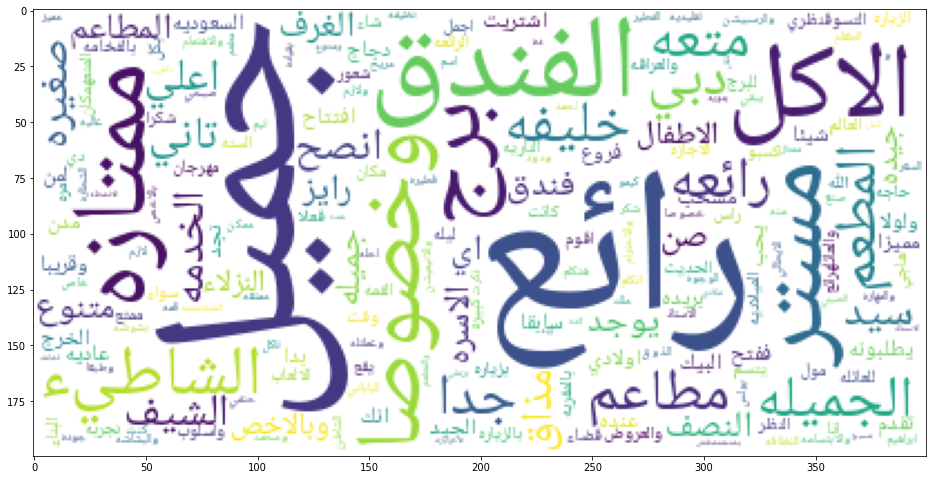

In [51]:
awc = ArabicWordCloud(background_color="white")
plt.figure(figsize = (16,16))
wc_ar = awc.from_text(u''.join(Data['Review_clean']))
plt.imshow(wc_ar)

## 4) POS tagging and NER

### A) POS tagging
- for Arabic language CAMel tools provides a tagger which has a disambiguator that select the best pos tag for a word based on the context it appears in.
- we need fist to import the tagger `MLEDisambiguator`
- The POS tagger require the text to be word tokenised. Here I used CAMel.simple_word_tokenize.
- CAMel provides more than 8 feature for each word, I selected three main to get the Lemma (`lex`) , diacratisation (`dia`), and Pos_tag (pos)

In [52]:
## Create Lemmatizer.
from camel_tools.tokenizers.word import simple_word_tokenize
from camel_tools.disambig.mle import MLEDisambiguator
mle = MLEDisambiguator.pretrained()

def lemmatizing(text):
    # The disambiguator expects pre-tokenized text
    text = simple_word_tokenize(text)
    disambig = mle.disambiguate(text)
    # features from the top analysis of each disambiguated word into seperate lists.
    diacritized = [d.analyses[0].analysis['diac'] for d in disambig]
    pos_tags = [d.analyses[0].analysis['pos'] for d in disambig]
    lemmas = [d.analyses[0].analysis['lex'] for d in disambig]
    word = text
    return pd.Series({ 'word': ' '.join(text),'diacritized': ' '.join(diacritized), 'lemmas': ' '.join(lemmas),'pos_tags':' '.join(pos_tags)})
##Creat a Dataframe containing the lemma, diacratised words and the pos tags
pos = Data.Review_clean.apply(lambda x:lemmatizing(x))

- view the result of the pos tagging as a whole.

In [53]:
pos

word  \
0  ŸÅŸÜÿØŸÇ ŸäŸÜÿ®ÿ∂ ÿ®ÿßŸÑÿ≠ŸäÿßŸá ÿßŸàŸÑÿß ÿßŸÑÿßÿ≥ÿ™ŸÇÿ®ÿßŸÑ ÿßÿÆÿµ ÿ®ÿßŸÑÿ¥ŸÉÿ± ŸÖÿ≥...   
1  ŸÖÿ¥ŸÅÿ™ÿ¥ ŸÉÿØŸá ÿßŸä ŸÅŸÜÿØŸÇ ÿ™ÿßŸÜŸä ÿßŸÑÿßŸÉŸÑ ŸÖŸÖÿ™ÿßÿ≤ ŸàŸÖÿ™ŸÜŸàÿπ ÿßŸÑŸÖÿ∑...   
2  ÿ±ÿßÿ¶ÿπ ÿ¨ÿØÿßŸã ÿ®ÿ±ÿ¨ ÿÆŸÑŸäŸÅŸá ÿßÿπŸÑŸä ÿßÿ¨ŸÖŸÑ ÿ®ÿ±ÿ¨ ÿßŸÑÿπÿßŸÑŸÖ ÿßŸÜÿµÿ≠ ...   
3  ŸÖŸÉÿßŸÜ ÿ¨ŸÖŸäŸÑ Ÿäÿ™ÿ≥ŸÖ ÿ®ÿßŸÑŸÅÿÆÿßŸÖŸá ŸàÿßŸÑÿπÿ±ÿßŸÇŸá Ÿàÿßÿ≥ŸÑŸàÿ® ÿßŸÑÿ®ŸÜÿßÿ°...   
4  ŸÜÿ∏ÿ±Ÿä ŸÖÿ∑ÿßÿπŸÖ ÿßŸÑÿ®ŸäŸÉ ŸÖÿ∑ÿßÿπŸÖ ÿπÿßÿØŸäŸá ÿå ÿ™ŸÇÿØŸÖ ÿ¥Ÿäÿ¶ÿß ŸÖŸÖŸäÿ≤ÿß...   

                                         diacritized  \
0  ŸÅŸèŸÜŸíÿØŸèŸÇŸê ŸäŸéŸÜŸíÿ®Ÿèÿ∂ ÿ®ŸêÿßŸÑÿ≠ŸéŸäÿßÿ© ÿ£ŸéŸàŸëŸéŸÑÿßŸã ÿßŸÑÿßŸêÿ≥Ÿíÿ™ŸêŸÇŸí...   
1  ŸÖÿ¥ŸÅÿ™ÿ¥ ŸÉŸéÿØŸëŸá ÿ£ŸéŸäŸë ŸÅŸèŸÜŸíÿØŸèŸÇŸê ÿ™Ÿéÿ£ŸéŸÜŸëŸêŸä ÿßŸÑÿ£ŸéŸÉŸíŸÑ ŸÖŸèŸÖ...   
2  ÿ±ÿßÿ¶ŸêÿπŸå ÿ¨ŸêÿØŸëÿßŸã ÿ®Ÿèÿ±Ÿíÿ¨ ÿÆŸéŸÑŸêŸäŸÅŸéÿ© ÿ£ŸéÿπŸíŸÑŸéŸâ ÿ£Ÿéÿ¨ŸíŸÖŸéŸÑŸê ...   
3  ŸÖŸéŸÉÿßŸÜŸç ÿ¨ŸéŸÖŸêŸäŸÑ ŸäŸéÿ™ŸëŸéÿ≥ŸêŸÖ ÿ®ŸêÿßŸÑŸÅŸéÿÆÿßŸÖŸéÿ© ŸàŸéÿßŸÑÿπŸéÿ±ÿßŸÇŸéÿ©...   
4  ŸÜŸéÿ∏Ÿéÿ±ŸêŸä ŸÖŸéÿ∑ÿßÿπŸêŸÖŸê ÿ£ŸèŸÑŸéÿ®ŸëŸêŸäŸÉŸé ŸÖŸéÿ∑ÿßÿπŸêŸÖŸê ÿπÿßÿØŸêŸäŸáŸê ÿå...   

                                              lemmas  \
0  ŸÅŸèŸÜŸíÿØŸèŸÇ ŸÜŸéÿ®Ÿéÿ∂ ÿ≠ŸéŸäÿßÿ© ÿ£ŸéŸàŸëŸéŸÑ Ÿ±Ÿêÿ≥Ÿíÿ™ŸêŸÇŸíÿ®ÿßŸÑ ÿÆŸéÿµŸë ÿ¥Ÿè...   
1  ŸÖÿ¥ŸÅÿ™ÿ¥ ŸÉŸéÿØŸë ÿ£ŸéŸäŸë ŸÅŸèŸÜŸíÿØŸèŸÇ ÿ™Ÿéÿ£ŸéŸÜŸëŸêŸä ÿ£ŸéŸÉŸíŸÑ ŸÖŸèŸÖŸíÿ™ÿßÿ≤...   
2  ÿ±ÿßÿ¶Ÿêÿπ ÿ¨ŸêÿØŸë ÿ®Ÿèÿ±Ÿíÿ¨ ÿÆŸéŸÑŸêŸäŸÅŸéÿ© ÿ£ŸéÿπŸíŸÑŸéŸâ ÿ£Ÿéÿ¨ŸíŸÖŸéŸÑ ÿ®Ÿèÿ±Ÿí...   
3  ŸÖŸéŸÉÿßŸÜ ÿ¨ŸéŸÖŸêŸäŸÑ Ÿ±Ÿêÿ™ŸëŸéÿ≥ŸéŸÖ ŸÅŸéÿÆÿßŸÖŸéÿ© ÿπŸéÿ±ÿßŸÇŸéÿ© ÿ£Ÿèÿ≥ŸíŸÑŸèŸàÿ®...   
4  ŸÜŸéÿ∏Ÿéÿ± ŸÖŸéÿ∑ŸíÿπŸéŸÖ ŸÑŸéÿ®ŸëŸéŸâ ŸÖŸéÿ∑ŸíÿπŸéŸÖ ÿπÿßÿØŸêŸä ÿå ÿ™ŸéŸÇŸéÿØŸëŸéŸÖ ...   

                                            pos_tags  
0  noun verb noun adj noun verb noun noun_prop no...  
1  noun_prop noun noun_quant noun noun noun adj a...  
2  adj noun noun_prop noun adj noun noun_prop nou...  
3  noun noun_prop verb noun noun noun noun noun v...  
4  noun noun verb noun noun punc verb noun adj pu...

- concatinating each word with its analysis to make it easier to check the performance of the choosed tagger.


In [54]:
for x in zip(pos.word[0].split(),pos.diacritized[0].split(),pos.lemmas[0].split(), pos.pos_tags[0].split(), ):
  print(x)

('ŸÅŸÜÿØŸÇ', 'ŸÅŸèŸÜŸíÿØŸèŸÇŸê', 'ŸÅŸèŸÜŸíÿØŸèŸÇ', 'noun')
('ŸäŸÜÿ®ÿ∂', 'ŸäŸéŸÜŸíÿ®Ÿèÿ∂', 'ŸÜŸéÿ®Ÿéÿ∂', 'verb')
('ÿ®ÿßŸÑÿ≠ŸäÿßŸá', 'ÿ®ŸêÿßŸÑÿ≠ŸéŸäÿßÿ©', 'ÿ≠ŸéŸäÿßÿ©', 'noun')
('ÿßŸàŸÑÿß', 'ÿ£ŸéŸàŸëŸéŸÑÿßŸã', 'ÿ£ŸéŸàŸëŸéŸÑ', 'adj')
('ÿßŸÑÿßÿ≥ÿ™ŸÇÿ®ÿßŸÑ', 'ÿßŸÑÿßŸêÿ≥Ÿíÿ™ŸêŸÇŸíÿ®ÿßŸÑŸê', 'Ÿ±Ÿêÿ≥Ÿíÿ™ŸêŸÇŸíÿ®ÿßŸÑ', 'noun')
('ÿßÿÆÿµ', 'ÿ£ŸéÿÆŸèÿµŸë', 'ÿÆŸéÿµŸë', 'verb')
('ÿ®ÿßŸÑÿ¥ŸÉÿ±', 'ÿ®ŸêÿßŸÑÿ¥ŸèŸÉŸíÿ±', 'ÿ¥ŸèŸÉŸíÿ±', 'noun')
('ŸÖÿ≥ÿ™ÿ±', 'ŸÖÿ≥ÿ™ÿ±', 'ŸÖÿ≥ÿ™ÿ±', 'noun_prop')
('ÿπŸÖÿ±Ÿà', 'ÿπŸéŸÖŸíÿ±Ÿà', 'ÿπŸéŸÖŸíÿ±Ÿà', 'noun_prop')
('ŸÑÿ≠ÿ≥ŸÜ', 'ŸÑŸêÿ≠Ÿèÿ≥ŸíŸÜŸê', 'ÿ≠Ÿèÿ≥ŸíŸÜ', 'noun')
('ÿßÿ≥ÿ™ŸÇÿ®ÿßŸÑŸá', 'ÿßŸêÿ≥Ÿíÿ™ŸêŸÇŸíÿ®ÿßŸÑŸêŸáŸê', 'Ÿ±Ÿêÿ≥Ÿíÿ™ŸêŸÇŸíÿ®ÿßŸÑ', 'noun')
('ÿßÿ±Ÿàÿπ', 'ÿ£Ÿéÿ±ŸíŸàŸéÿπŸè', 'ÿ£Ÿéÿ±ŸíŸàŸéÿπ', 'noun')
('ŸäŸÖŸäÿ≤', 'ŸäŸèŸÖŸéŸäŸëŸêÿ≤', 'ŸÖŸéŸäŸëŸéÿ≤', 'verb')
('ÿßŸÑŸÅŸÜÿØŸÇ', 'ÿßŸÑŸÅŸèŸÜŸíÿØŸèŸÇŸê', 'ŸÅŸèŸÜŸíÿØŸèŸÇ', 'noun')
('ŸÖÿØŸä', 'ŸÖŸéÿØŸéŸâ', 'ŸÖŸéÿØŸéŸâ', 'noun')
('ÿßÿ≠ÿ™ÿ±ÿßŸÅŸäŸá', 'ÿßŸêÿ≠Ÿíÿ™Ÿêÿ±ÿßŸÅŸéŸäŸíŸáŸê', 'Ÿ±Ÿêÿ≠Ÿíÿ™Ÿêÿ±ÿßŸÅ', 'noun')
('ÿßŸÑÿπÿ

## B) Arabic NER
- CAMel provides a pretrained Named Entity Recognition model which I have comapred it berfor with other avialable Arabic NERs and it proved its performance.
- It provides the four main classes: Location (LOC), Miscellaneous (MISC), Organization (ORG), and Person (PERS). 

In [55]:
from camel_tools.ner import NERecognizer

ner = NERecognizer.pretrained()
def NER(text):
    # The disambiguator expects pre-tokenized text
    sentence = simple_word_tokenize(text)
    labels = ner.predict_sentence(sentence)
    return pd.Series({ 'words': ' '.join(sentence),'labels': ' '.join(labels)})
##Creat a Dataframe containing the word with its NER Tag
NER = Data.Review_clean.apply(lambda x:NER(x))

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


Moving 0 files to the new cache system


0it [00:00, ?it/s]

- view the result of the NER tagging as a whole.

In [56]:
NER

words  \
0  ŸÅŸÜÿØŸÇ ŸäŸÜÿ®ÿ∂ ÿ®ÿßŸÑÿ≠ŸäÿßŸá ÿßŸàŸÑÿß ÿßŸÑÿßÿ≥ÿ™ŸÇÿ®ÿßŸÑ ÿßÿÆÿµ ÿ®ÿßŸÑÿ¥ŸÉÿ± ŸÖÿ≥...   
1  ŸÖÿ¥ŸÅÿ™ÿ¥ ŸÉÿØŸá ÿßŸä ŸÅŸÜÿØŸÇ ÿ™ÿßŸÜŸä ÿßŸÑÿßŸÉŸÑ ŸÖŸÖÿ™ÿßÿ≤ ŸàŸÖÿ™ŸÜŸàÿπ ÿßŸÑŸÖÿ∑...   
2  ÿ±ÿßÿ¶ÿπ ÿ¨ÿØÿßŸã ÿ®ÿ±ÿ¨ ÿÆŸÑŸäŸÅŸá ÿßÿπŸÑŸä ÿßÿ¨ŸÖŸÑ ÿ®ÿ±ÿ¨ ÿßŸÑÿπÿßŸÑŸÖ ÿßŸÜÿµÿ≠ ...   
3  ŸÖŸÉÿßŸÜ ÿ¨ŸÖŸäŸÑ Ÿäÿ™ÿ≥ŸÖ ÿ®ÿßŸÑŸÅÿÆÿßŸÖŸá ŸàÿßŸÑÿπÿ±ÿßŸÇŸá Ÿàÿßÿ≥ŸÑŸàÿ® ÿßŸÑÿ®ŸÜÿßÿ°...   
4  ŸÜÿ∏ÿ±Ÿä ŸÖÿ∑ÿßÿπŸÖ ÿßŸÑÿ®ŸäŸÉ ŸÖÿ∑ÿßÿπŸÖ ÿπÿßÿØŸäŸá ÿå ÿ™ŸÇÿØŸÖ ÿ¥Ÿäÿ¶ÿß ŸÖŸÖŸäÿ≤ÿß...   

                                              labels  
0  O O O O O O O O B-PERS O O O O O O O O O O O O...  
1  O O O O O O O O O O O O O O O O O O O O O O O ...  
2  O O O I-MISC O O O O O O O O O O O O O I-MISC ...  
3  O O O O O O O O O O O O O O O O O O O O O O O ...  
4  O O B-ORG O O O O O O O O O O O O O O O O O O ...

In [57]:
for x in zip(NER.words[0].split(),NER.labels[0].split()):
  print (x)

('ŸÅŸÜÿØŸÇ', 'O')
('ŸäŸÜÿ®ÿ∂', 'O')
('ÿ®ÿßŸÑÿ≠ŸäÿßŸá', 'O')
('ÿßŸàŸÑÿß', 'O')
('ÿßŸÑÿßÿ≥ÿ™ŸÇÿ®ÿßŸÑ', 'O')
('ÿßÿÆÿµ', 'O')
('ÿ®ÿßŸÑÿ¥ŸÉÿ±', 'O')
('ŸÖÿ≥ÿ™ÿ±', 'O')
('ÿπŸÖÿ±Ÿà', 'B-PERS')
('ŸÑÿ≠ÿ≥ŸÜ', 'O')
('ÿßÿ≥ÿ™ŸÇÿ®ÿßŸÑŸá', 'O')
('ÿßÿ±Ÿàÿπ', 'O')
('ŸäŸÖŸäÿ≤', 'O')
('ÿßŸÑŸÅŸÜÿØŸÇ', 'O')
('ŸÖÿØŸä', 'O')
('ÿßÿ≠ÿ™ÿ±ÿßŸÅŸäŸá', 'O')
('ÿßŸÑÿπÿßŸÖŸÑŸäŸÜ', 'O')
('ŸÑÿßÿ≥ÿπÿßÿØ', 'O')
('ÿßŸÑŸÜÿ≤ŸÑÿßÿ°', 'O')
('ŸÑÿßŸäŸàÿ¨ÿØ', 'O')
('ÿßŸä', 'O')
('ÿ™ŸÅÿ±ŸÇŸá', 'O')
('ÿßŸÑÿ™ÿπÿßŸÖŸÑ', 'O')
('ÿßŸÑŸÖÿµÿ±ŸäŸäŸÜ', 'O')
('ŸÅÿ±ŸäŸÇ', 'O')
('ÿßŸÜŸäŸÖŸäÿ¥ŸÜ', 'B-ORG')
('ÿßÿπŸÑŸä', 'O')
('ŸÖÿ≥ÿ™ŸàŸä', 'O')
('ŸÑŸÖÿ≠ÿßŸàŸÑŸá', 'O')
('ÿßÿ≥ÿπÿßÿØ', 'O')
('ÿßŸÑŸÜÿ≤ŸÑÿßÿ°', 'O')
('Ÿàÿ®ÿßŸÑÿßÿÆÿµ', 'O')
('ŸÖÿ≥ÿ™ÿ±', 'O')
('ÿ≥ÿπŸäÿØ', 'B-PERS')
('ŸàŸÖÿ≥ÿ™ÿ±', 'O')
('ŸÜŸàÿ±Ÿä', 'I-PERS')
('ÿßŸÑÿßŸÉŸàÿß', 'B-ORG')
('ÿ®ÿßÿ±ŸÉ', 'I-ORG')
('ŸÖÿπŸÇŸàŸÑŸá', 'O')
('Ÿàÿ™ŸÜÿßÿ≥ÿ®', 'O')
('ÿßŸÑÿßÿ∑ŸÅÿßŸÑ', 'O')
('ÿßŸÑŸÖÿ∑ÿßÿπŸÖ', 'O')
('ÿ¨ŸäÿØŸá', 'O')
('ŸàÿßŸÑÿßŸÉŸÑ', 'O')
('ŸÖÿ™ŸÜŸàÿπ', 'O')
('Ÿàÿ∞Ÿà', 'O')
('ŸÖÿ∞ÿßŸÇ', 'O')

- **NOTE: after maual analysis of both CAMeL pos tagger and NER results showed a very high performance in Arabic language anlysis ** 

## 5) Sentiment analysis
- like other ongoing many NLP research its techniques have moved away from manually hand-crafted rules towards deep learning techniques.Either by applying
word embedding, or contextualised embedding such as **BERT**.

- sentiment analysis task involves classification of a text against binary criteria [positive and negative] or three classes [positive, nuteral, negative]. nuteral here referring to the sentences that have contadiction inside that the system can not decide.

- Further, CAMel tool provides a **BERT** Sentiment Analysis (SA) model  for either the Arabic Dialects(DA) for Arabic Modern standard language (MSA). 
- As the reviews are not formal language which are written from different Arabs visting the same place it is better to employ the dialectal Arabic model. DA model is uploaded on [Huggingface](CAMeL-Lab/bert-base-arabic-camelbert-da-sentiment)  and easy to deploy.
-The Dialectal Arabic model (DA) was fine-tuned uisng ASTD, ArSAS, and SemEval datasets. [reference: The Interplay of Variant, Size, and Task Type in Arabic Pre-trained Language Models](https://arxiv.org/abs/2103.06678)

- CAMeL BERT DA provides sentiment analysis of  [positive,nuteral, negative], as well as a score for the positivity and negativity. These scores will be in use when analys sentence per sentence.
 

1- convert the scores as a reference to negative if the score is less than 4 points. and assign positive to the reviews with score equal or more than 4 points.

In [58]:
## convert scores to Positive vs. Negative
def getAnalysis(score):
 if score < 4:
    return 'Negative'
 else:
    return 'Positive'

Data['sentiment'] = Data['score'].apply(getAnalysis)

2- creat a subset data frame `Data_sentiment` of the data with the final cleaned text not the tagged as the sentiment analyser requires the data in a sentence format to apply BERT.

In [59]:
Data_sentiment = Data[['Review_clean','score', 'sentiment' ]]
Data_sentiment

Review_clean  score sentiment
0  ŸÅŸÜÿØŸÇ ŸäŸÜÿ®ÿ∂ ÿ®ÿßŸÑÿ≠ŸäÿßŸá ÿßŸàŸÑÿß ÿßŸÑÿßÿ≥ÿ™ŸÇÿ®ÿßŸÑ ÿßÿÆÿµ ÿ®ÿßŸÑÿ¥ŸÉÿ± ŸÖÿ≥...      4  Positive
1  ŸÖÿ¥ŸÅÿ™ÿ¥ ŸÉÿØŸá ÿßŸä ŸÅŸÜÿØŸÇ ÿ™ÿßŸÜŸä ÿßŸÑÿßŸÉŸÑ ŸÖŸÖÿ™ÿßÿ≤ ŸàŸÖÿ™ŸÜŸàÿπ ÿßŸÑŸÖÿ∑...      4  Positive
2  ÿ±ÿßÿ¶ÿπ ÿ¨ÿØÿßŸã ÿ®ÿ±ÿ¨ ÿÆŸÑŸäŸÅŸá ÿßÿπŸÑŸä ÿßÿ¨ŸÖŸÑ ÿ®ÿ±ÿ¨ ÿßŸÑÿπÿßŸÑŸÖ ÿßŸÜÿµÿ≠ ...      4  Positive
3  ŸÖŸÉÿßŸÜ ÿ¨ŸÖŸäŸÑ Ÿäÿ™ÿ≥ŸÖ ÿ®ÿßŸÑŸÅÿÆÿßŸÖŸá ŸàÿßŸÑÿπÿ±ÿßŸÇŸá Ÿàÿßÿ≥ŸÑŸàÿ® ÿßŸÑÿ®ŸÜÿßÿ°...      5  Positive
4  ŸÜÿ∏ÿ±Ÿä ŸÖÿ∑ÿßÿπŸÖ ÿßŸÑÿ®ŸäŸÉ ŸÖÿ∑ÿßÿπŸÖ ÿπÿßÿØŸäŸáÿå ÿ™ŸÇÿØŸÖ ÿ¥Ÿäÿ¶ÿß ŸÖŸÖŸäÿ≤ÿßÿå...      3  Negative

- The data is composed of *four* positive reviews and one negative.

In [60]:
Data['sentiment'].value_counts()

Positive    4
Negative    1
Name: sentiment, dtype: int64

##`**Document level**`
3-  apply the sentiment analyser on the reviews as a whole.

In [61]:
from camel_tools.sentiment import SentimentAnalyzer
t = time.time()
sa = SentimentAnalyzer.pretrained()
def sentiment(sentences):
  sentiments = sa.predict(sentences)
  return sentiments
pred = Data_sentiment['Review_clean'].apply(lambda x:sentiment(x))

print(f'Prediction complete.')
print(f'Time Elapsed: {round(time.time()-t)} seconds')

Prediction complete.
Time Elapsed: 12 seconds


- add the prediction as a column in the `Data_sentiment`

In [62]:
import itertools
merged = list(itertools.chain(*pred))
Data_sentiment ['pred']= merged

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


- view the `Data_sentiment` and compare the original sentimnet retrived from the website against the prediction value.

In [63]:
Data_sentiment

Review_clean  score sentiment  \
0  ŸÅŸÜÿØŸÇ ŸäŸÜÿ®ÿ∂ ÿ®ÿßŸÑÿ≠ŸäÿßŸá ÿßŸàŸÑÿß ÿßŸÑÿßÿ≥ÿ™ŸÇÿ®ÿßŸÑ ÿßÿÆÿµ ÿ®ÿßŸÑÿ¥ŸÉÿ± ŸÖÿ≥...      4  Positive   
1  ŸÖÿ¥ŸÅÿ™ÿ¥ ŸÉÿØŸá ÿßŸä ŸÅŸÜÿØŸÇ ÿ™ÿßŸÜŸä ÿßŸÑÿßŸÉŸÑ ŸÖŸÖÿ™ÿßÿ≤ ŸàŸÖÿ™ŸÜŸàÿπ ÿßŸÑŸÖÿ∑...      4  Positive   
2  ÿ±ÿßÿ¶ÿπ ÿ¨ÿØÿßŸã ÿ®ÿ±ÿ¨ ÿÆŸÑŸäŸÅŸá ÿßÿπŸÑŸä ÿßÿ¨ŸÖŸÑ ÿ®ÿ±ÿ¨ ÿßŸÑÿπÿßŸÑŸÖ ÿßŸÜÿµÿ≠ ...      4  Positive   
3  ŸÖŸÉÿßŸÜ ÿ¨ŸÖŸäŸÑ Ÿäÿ™ÿ≥ŸÖ ÿ®ÿßŸÑŸÅÿÆÿßŸÖŸá ŸàÿßŸÑÿπÿ±ÿßŸÇŸá Ÿàÿßÿ≥ŸÑŸàÿ® ÿßŸÑÿ®ŸÜÿßÿ°...      5  Positive   
4  ŸÜÿ∏ÿ±Ÿä ŸÖÿ∑ÿßÿπŸÖ ÿßŸÑÿ®ŸäŸÉ ŸÖÿ∑ÿßÿπŸÖ ÿπÿßÿØŸäŸáÿå ÿ™ŸÇÿØŸÖ ÿ¥Ÿäÿ¶ÿß ŸÖŸÖŸäÿ≤ÿßÿå...      3  Negative   

       pred  
0  positive  
1  positive  
2  positive  
3  positive  
4  positive

4- Error analysis

- In the data_sentiment, the original sentiment value of the last review with the index [negative] contradict with the predictive value [positive]
- reviweing the arabic text showed that it is not clear to be classified as a negtive review and it contain 5 setences only one of which has a negative conatation.

In [64]:
Data_sentiment.Review_clean[4]

'ŸÜÿ∏ÿ±Ÿä ŸÖÿ∑ÿßÿπŸÖ ÿßŸÑÿ®ŸäŸÉ ŸÖÿ∑ÿßÿπŸÖ ÿπÿßÿØŸäŸáÿå ÿ™ŸÇÿØŸÖ ÿ¥Ÿäÿ¶ÿß ŸÖŸÖŸäÿ≤ÿßÿå ŸàÿÆÿµŸàÿµÿß ÿßŸÜŸÉ ÿ™ÿ¨ÿØ ÿπŸÜÿØŸá ÿØÿ¨ÿßÿ¨ ŸÖÿ≥ÿ≠Ÿëÿ®ÿå ŸàŸÑŸàŸÑÿß ÿßŸàŸÑÿßÿØŸä Ÿäÿ∑ŸÑÿ®ŸàŸÜŸá ÿßÿ¥ÿ™ÿ±Ÿäÿ™ ÿßŸÑÿ¨ŸäÿØ ŸÑŸÖŸÜ Ÿäÿ≠ÿ® ÿßŸÑŸÖÿ∑ÿπŸÖ ÿ®ÿØÿß ÿßŸÅÿ™ÿ™ÿßÿ≠ ŸÅÿ±Ÿàÿπ ŸÖÿØŸÜ ÿßŸÑÿ≥ÿπŸàÿØŸäŸáÿå ŸÅŸÅÿ™ÿ≠ ÿ≥ÿßÿ®ŸÇÿß ÿ®ÿ±ŸäÿØŸáÿå ŸàŸÇÿ±Ÿäÿ®ÿß ÿßŸÑÿÆÿ±ÿ¨'

5- Print the evaluation metrics for the dataset
- convert the Sentiment and predictions to binary in order to get the classificatin report and the accuracy measures.

In [65]:
Data_sentiment['Label'] = pd.factorize( Data_sentiment['sentiment'])[0]
Data_sentiment ['pred_Label']= pd.factorize(Data_sentiment['pred'])[0]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


### **The results in the classification report showes weighted average P = 0.64 , R = 0.71, and F1-measure =0.71 with 0.80 accuracy**

In [66]:
from sklearn.metrics import classification_report, accuracy_score
print(classification_report(Data_sentiment.Label, Data_sentiment.pred_Label))
print(f"Accuracy score :  {accuracy_score(Data_sentiment.Label, Data_sentiment.pred_Label)}")

              precision    recall  f1-score   support

           0       0.80      1.00      0.89         4
           1       0.00      0.00      0.00         1

    accuracy                           0.80         5
   macro avg       0.40      0.50      0.44         5
weighted avg       0.64      0.80      0.71         5

Accuracy score :  0.8


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## 6) Sentiment scores ranking

- In order to get the actual scores of the sentiment analysis, CAMel tools requires install transformers to access the` bert-base-arabic` pipline model.

In [67]:
!pip install transformers>=3.5.0

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
selenium 4.4.3 requires urllib3[socks]~=1.26, but you have urllib3 1.25.11 which is incompatible.


- get the scores of each sentiment analysis.

In [68]:
from transformers import pipeline
sa = pipeline('text-classification', model='CAMeL-Lab/bert-base-arabic-camelbert-da-sentiment')
def sentiment_score(sentences):
  sentiments = sa(sentences)
  for x in range (len(sentiments)) :
      scores=(list(sentiments[x].values()))
  return pd.Series(scores,index=['Label','Score'])
sentiment_score = Data_sentiment['Review_clean'].apply(lambda x:sentiment_score(x))

Downloading:   0%|          | 0.00/841 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/436M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/86.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/305k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

In [69]:
Data_sentiment['Review_clean']

0    ŸÅŸÜÿØŸÇ ŸäŸÜÿ®ÿ∂ ÿ®ÿßŸÑÿ≠ŸäÿßŸá ÿßŸàŸÑÿß ÿßŸÑÿßÿ≥ÿ™ŸÇÿ®ÿßŸÑ ÿßÿÆÿµ ÿ®ÿßŸÑÿ¥ŸÉÿ± ŸÖÿ≥...
1    ŸÖÿ¥ŸÅÿ™ÿ¥ ŸÉÿØŸá ÿßŸä ŸÅŸÜÿØŸÇ ÿ™ÿßŸÜŸä ÿßŸÑÿßŸÉŸÑ ŸÖŸÖÿ™ÿßÿ≤ ŸàŸÖÿ™ŸÜŸàÿπ ÿßŸÑŸÖÿ∑...
2    ÿ±ÿßÿ¶ÿπ ÿ¨ÿØÿßŸã ÿ®ÿ±ÿ¨ ÿÆŸÑŸäŸÅŸá ÿßÿπŸÑŸä ÿßÿ¨ŸÖŸÑ ÿ®ÿ±ÿ¨ ÿßŸÑÿπÿßŸÑŸÖ ÿßŸÜÿµÿ≠ ...
3    ŸÖŸÉÿßŸÜ ÿ¨ŸÖŸäŸÑ Ÿäÿ™ÿ≥ŸÖ ÿ®ÿßŸÑŸÅÿÆÿßŸÖŸá ŸàÿßŸÑÿπÿ±ÿßŸÇŸá Ÿàÿßÿ≥ŸÑŸàÿ® ÿßŸÑÿ®ŸÜÿßÿ°...
4    ŸÜÿ∏ÿ±Ÿä ŸÖÿ∑ÿßÿπŸÖ ÿßŸÑÿ®ŸäŸÉ ŸÖÿ∑ÿßÿπŸÖ ÿπÿßÿØŸäŸáÿå ÿ™ŸÇÿØŸÖ ÿ¥Ÿäÿ¶ÿß ŸÖŸÖŸäÿ≤ÿßÿå...
Name: Review_clean, dtype: object

- add the score to the `Data_sentiment`

In [70]:
Data_sentiment['sentiment_score'] = sentiment_score['Score']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


- sort the reviews by the sentiment score

In [71]:
Data_sentiment.sort_values("sentiment_score", inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


## **The `ranked` list of the reviews based on the CAMeL score**

In [72]:
Data_sentiment

Review_clean  score sentiment  \
4  ŸÜÿ∏ÿ±Ÿä ŸÖÿ∑ÿßÿπŸÖ ÿßŸÑÿ®ŸäŸÉ ŸÖÿ∑ÿßÿπŸÖ ÿπÿßÿØŸäŸáÿå ÿ™ŸÇÿØŸÖ ÿ¥Ÿäÿ¶ÿß ŸÖŸÖŸäÿ≤ÿßÿå...      3  Negative   
0  ŸÅŸÜÿØŸÇ ŸäŸÜÿ®ÿ∂ ÿ®ÿßŸÑÿ≠ŸäÿßŸá ÿßŸàŸÑÿß ÿßŸÑÿßÿ≥ÿ™ŸÇÿ®ÿßŸÑ ÿßÿÆÿµ ÿ®ÿßŸÑÿ¥ŸÉÿ± ŸÖÿ≥...      4  Positive   
3  ŸÖŸÉÿßŸÜ ÿ¨ŸÖŸäŸÑ Ÿäÿ™ÿ≥ŸÖ ÿ®ÿßŸÑŸÅÿÆÿßŸÖŸá ŸàÿßŸÑÿπÿ±ÿßŸÇŸá Ÿàÿßÿ≥ŸÑŸàÿ® ÿßŸÑÿ®ŸÜÿßÿ°...      5  Positive   
2  ÿ±ÿßÿ¶ÿπ ÿ¨ÿØÿßŸã ÿ®ÿ±ÿ¨ ÿÆŸÑŸäŸÅŸá ÿßÿπŸÑŸä ÿßÿ¨ŸÖŸÑ ÿ®ÿ±ÿ¨ ÿßŸÑÿπÿßŸÑŸÖ ÿßŸÜÿµÿ≠ ...      4  Positive   
1  ŸÖÿ¥ŸÅÿ™ÿ¥ ŸÉÿØŸá ÿßŸä ŸÅŸÜÿØŸÇ ÿ™ÿßŸÜŸä ÿßŸÑÿßŸÉŸÑ ŸÖŸÖÿ™ÿßÿ≤ ŸàŸÖÿ™ŸÜŸàÿπ ÿßŸÑŸÖÿ∑...      4  Positive   

       pred  Label  pred_Label  sentiment_score  
4  positive      1           0         0.495232  
0  positive      0           0         0.960965  
3  positive      0           0         0.986649  
2  positive      0           0         0.992633  
1  positive      0           0         0.992704

##`**Sentence level**`
- this is just to illistarte how we can apply the SA to each sentence. but as there is no reference to the sentence SA I just applied and ranked on the first review.
- applying the same sentiment analyser on the tokenised sentences per each document.
- as it was rarly users put the full stop or any sentence delimeter to their writings. I applied the SA on the first review and ranked the sentiment scors.


In [73]:
##apply the SA
score = sa( Data['Review_sent_token'][0])
sent_score= pd.DataFrame(score)

In [74]:
## add the original text column to the SA scores
sent_score['text']=Data['Review_sent_token'][0] 
## sor the data to rank the SA scores
sent_score.sort_values("score", inplace = True)
sent_score

label     score                                               text
9   positive  0.500818  ÿßŸÑÿ∫ÿ±ŸÅ ÿ¨ŸÖŸäŸÑŸá ŸàŸÑŸÉŸÜ ÿßÿ´ÿßÿ´Ÿáÿß ŸÖÿ™Ÿàÿßÿ∂ÿπ ŸàŸÖÿ≥ÿßÿ≠Ÿá ÿßŸÑÿ¨ÿ≤ÿ° ÿßŸÑ...
10   neutral  0.508116               ÿßŸÑŸÅŸÜÿØŸÇ ŸäŸÜÿßÿ≥ÿ® ÿßŸÑÿßÿ≥ÿ±Ÿá Ÿàÿ®ÿßŸÑÿßÿÆÿµ ÿßŸÑÿ£ÿ∑ŸÅÿßŸÑ 
15  positive  0.547234                           ŸäŸàÿ¨ÿØ ÿßŸÉÿ´ÿ± ŸÖŸÜ ŸÖÿ≥ÿ®ÿ≠ ÿØÿßŸÅŸâÿ° 
3    neutral  0.708664            ŸÑÿßŸäŸàÿ¨ÿØ ÿßŸâ ÿ™ŸÅÿ±ŸÇŸá ŸÅŸâ ÿßŸÑÿ™ÿπÿßŸÖŸÑ ŸÖÿπ ÿßŸÑŸÖÿµÿ±ŸäŸäŸÜ 
13   neutral  0.800246  ÿßŸÑŸÜÿµŸÅ ÿßŸÑÿ£ŸàŸÑ ŸàŸáŸàÿß ÿßŸÑŸÖŸàÿßÿ¨Ÿá ŸÑŸÑÿ¥ÿßÿ∑Ÿâÿ° Ÿàÿ£ÿµÿ®ÿ≠ ÿßÿ≥ŸÖŸá ÿ™Ÿà...
7   positive  0.881670                                    ÿßŸÑÿ≥ŸÜÿßŸÉÿ≥ ŸÖŸÖÿ™ÿßÿ≤Ÿá 
18  positive  0.887154                                       ÿßŸÜÿµÿ≠ ÿ®Ÿá ÿ®ÿ¥ÿØŸá
4   positive  0.889020  ŸÅÿ±ŸäŸÇ ÿßŸÜŸäŸÖŸäÿ¥ŸÜ ÿπŸÑŸâ ÿ£ÿπŸÑŸâ ŸÖÿ≥ÿ™ŸàŸâ ŸÑŸÖÿ≠ÿßŸàŸÑŸá ÿßÿ≥ÿπÿßÿØ ÿßŸÑŸÜÿ≤...
5    neutral  0.911936                 ÿßŸÑÿßŸÉŸàÿß ÿ®ÿßÿ±ŸÉ ŸÖÿπŸÇŸàŸÑŸá Ÿàÿ™ŸÜÿßÿ≥ÿ® ÿßŸÑÿ£ÿ∑ŸÅÿßŸÑ 
12   neutral  0.914394                         ÿ™ŸÖ ÿ™ŸÇÿ≥ŸäŸÖ ÿßŸÑŸÅŸÜÿØŸÇ ÿ•ŸÑŸâ ŸÇÿ≥ŸÖŸäŸÜ 
17   neutral  0.929259                      ŸäŸàÿ¨ÿØ ÿ®ÿπÿ∂ ÿßŸÑÿßŸÜÿ¥ÿ∑Ÿá ÿπŸÑŸâ ÿßŸÑÿ¥ÿßÿ∑Ÿäÿ° 
8   positive  0.930768                                    ÿßŸÑŸÖÿ¥ÿ±Ÿàÿ®ÿßÿ™ ÿ¨ŸäÿØŸá 
11  positive  0.953595           ÿßŸÑÿ≠ŸÅŸÑÿßÿ™ ÿ¨ŸÖŸäŸÑŸá ŸàŸÖŸÖÿ™ÿπŸá ŸÑÿ¨ŸÖŸäÿπ ÿßŸÅÿ±ÿßÿØ ÿßŸÑÿßÿ≥ÿ±Ÿá 
0   positive  0.968660                                 ŸÅŸÜÿØŸÇ ŸäŸÜÿ®ÿ∂ ÿ®ÿßŸÑÿ≠ŸäÿßŸá 
6   positive  0.977864       ÿßŸÑŸÖÿ∑ÿßÿπŸÖ ÿ¨ŸäÿØŸá ÿ¨ÿØÿß ŸàÿßŸÑÿßŸÉŸÑ ŸÖÿ™ŸÜŸàÿπ Ÿàÿ∞Ÿà ŸÖÿ∞ÿßŸÇ ÿ±ÿßÿ¶ÿπ 
14   neutral  0.979074  ÿßŸÑŸÜÿµŸÅ ÿßŸÑÿ´ÿßŸÜŸä ŸàŸáŸà ÿßŸÑÿÆŸÑŸÅŸä ŸàŸáŸà ÿµŸÜ ÿ±ÿßŸäÿ≤ ÿ±ŸàŸäÿßŸÑ ŸÖŸÉÿßÿØ...
16  positive  0.986343  ÿßŸÑÿ¥ÿßÿ∑Ÿäÿ° ÿ¨ŸÖŸäŸÑ ÿ¨ÿØÿß Ÿàÿ±ŸÖŸÑŸâ ŸàŸÖŸÜ ÿ¥ÿØŸá ŸÜŸÇÿßÿ° ÿßŸÑŸÖÿßÿ° ÿ™ÿ¥ÿßŸá...
1   positive  0.990248  ÿßŸàŸÑÿß ÿßŸÑÿßÿ≥ÿ™ŸÇÿ®ÿßŸÑ ÿßÿÆÿµ ÿ®ÿßŸÑÿ¥ŸÉÿ± ŸÖÿ≥ÿ™ÿ± ÿπŸÖÿ±Ÿà ŸÑÿ≠ÿ≥ŸÜ ÿßÿ≥ÿ™ŸÇÿ®...
2   positive  0.990748  ÿ£ÿ±Ÿàÿπ ŸÖÿß ŸäŸÖŸäÿ≤ ÿßŸÑŸÅŸÜÿØŸÇ ŸÖÿØŸâ ÿßÿ≠ÿ™ÿ±ÿßŸÅŸäŸá ÿßŸÑÿπÿßŸÖŸÑŸäŸÜ ÿ®Ÿá ŸÑ...